# 서울시 뉴딜일자리 사업정보
데이터 링크 : http://data.seoul.go.kr/dataList/OA-15355/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/일일 데이터 분석

/content/drive/MyDrive/일일 데이터 분석


In [166]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import json
with open('./서울시 뉴딜일자리 사업정보.json', 'r') as f:
    json_data = json.load(f)

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

def pie_plot(frequency,labels,palette,title=None):
  labels_frequency = zip(labels,frequency,palette) 
  labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)

  sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
  sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
  sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
  
  # 0값이 있는 경우 제거
  while 0 in sorted_frequency:
    idx = sorted_frequency.index(0)
    sorted_frequency.pop(idx)
    sorted_labels.pop(idx)
  
  fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
  ax = fig.add_subplot() ## 프레임 생성
    
  ## 파이차트 출력
  pie = ax.pie(sorted_frequency,
               startangle=90, 
               counterclock=False, 
               colors = sorted_colors, 
               wedgeprops=wedgeprops
              )
  
  total = np.sum(frequency) ## 빈도수 합
  
  threshold = 5
  sum_pct = 0 ## 퍼센티지
  count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
  spacing = 0.1 # 텍스트 사이의 간격

  for i,l in enumerate(sorted_labels):
      ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
      center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표, 반지름
      
      ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
      if sorted_frequency[i]/total*100 < threshold:
          x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
          count_less_5pct += 1
      else:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
      
      ## 퍼센티지 출력
      if i < len(labels) - 1:
          sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
          ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=15)
      else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
          ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=15)
  
  plt.legend(pie[0],sorted_labels,fontsize=13) ## 범례
  if title:
    plt.title(title,size=20)
  plt.show()

In [77]:
data = pd.DataFrame(json_data['DATA'])
col_list = [json_data['DESCRIPTION'][x.upper()] for x in data.columns]
data.columns = col_list

In [135]:
def preprocessing(dataframe):
  df = dataframe.copy()

  df['사업년도'] = df['사업년도'].astype(np.int)
  df['월'] = df['근로기간 시작일자'].map(lambda x: np.int(str(x)[4:6]) if len(str(x)) >= 6 else np.nan)
  return df

job = preprocessing(data)

In [136]:
pd.set_option('display.max_columns',None)
job.head()

,파트타임 계획인원,파트타임 시급,사업년도,전일근무 일근로시간,전일근무 계획인원,근로기간 시작일자,전일근무 금회선발인원,하위사업분류,참여대상,사업목적,하위기관명,상위사업분류,상위기관명,부서명,전일근무 시급,파트타임 금회선발인원,파트타임 일근로시간,근로기간 종료일자,뉴딜사업명,사업유형,사업담당자 전화번호,근무조건,이런일을 합니다,월
0,0.0,0.0,2023,8.0,1.0,20230403,1.0,환경·에너지·안전,청년,○ 5년 이상의 경력을 보유한 전문 연구원들로부터 고성능 분석기기 원리 및 사용 ...,상수도사업본부,"환경,안전",사업소,서울물연구원 신물질분석과,11157.0,0.0,0.0,20240329,고성능 분석장비를 이용한 286개 수질항목 모니터링,시직접추진,02-3146-1767,"○ 근로조건 : 주5일, 1일 8시간\r\n○ 근로임금 : 시급 11,157원\r\...",○ 현장 수질 시료 채취부터 시료 전처리 및 분석기기 사용까지 전반적인 과정 수행\...,4.0
1,0.0,0.0,2023,8.0,2.0,20230401,NaN,문화·예술·디자인·방송,청년,1. 사업목적\r\n○ 자치분권 시대를 맞이하여 새롭게 수요가 증가하고 있는 지역학...,성북구,문화,자치구,문화체육과,11157.0,NaN,0.0,20240331,지역학 전문가 양성과정 (성북학연구원),자치구추긴,02-2241-2606,"○ 매니저 1명 배치 : 매니저 1인, 참여자 2명 관리 예정\r\n○ 사무공간·사...","○ 역 할 : 지역학 연구를 위한 자료 수집 및 정리, 연구 네트워크 구성 활...",4.0
2,0.0,0.0,2023,8.0,26.0,20230401,26.0,사회복지·보육·상담,일반,서울시 대표 보육모델인 '서울형 모아어린이집'은 어린이집 3~5곳이 공동체를 구...,여성가족정책실,복지,본청,영유아담당관,11157.0,NaN,0.0,20240331,어린이집 상생협력 코디네이터,시직접추진,02-2133-5093,"○ 근로조건\r\n - 임금 : 1일 89,256원 (시급11,157원) \r\n ...",① 서울시 대표 보육모델인 서울형 모아어린이집 전담 코디네이터 수행\r\n ○...,4.0
3,0.0,0.0,2023,8.0,3.0,20230401,3.0,사업관리,청년,"예비 창업자에게 창업초기 상담부터 온라인 판로개척, 홍보에 이르기까지 원스탑창업지원...",양천구,경제,자치구,일자리경제과,11157.0,NaN,0.0,20240331,창업지원 전문가 육성사업,자치구추긴,02-2620-4818,"○근로기간: 12개월\r\n○근로시간: 주40시간(주5일),\r\n○ 임금: 일급 ...","○ 업무내용\r\n - (온라인)창업을 위한 행정적절차 안내, 상권분석 컨설팅\...",4.0
4,0.0,0.0,2023,8.0,10.0,20230401,10.0,사회복지·보육·상담,일반,1.사업소개\r\n 어울림은 장애인생산품 판매 활성화를 위해 일할 참여자를 모집하고...,복지정책실,복지,본청,장애인자립지원과 장애인일자리팀,11157.0,NaN,0.0,20240331,중증장애인 고용지원 활동가 양성사업 『어울림』,시직접추진,02-2133-9616,1. 근무 기간: 2023년 4월~2024년 3월(12개월)\r\n2. 근무 시간:...,1. 중증장애인의 고용유지를 돕는 물류유통 활동가(5인)\r\n: 시립장애인생산품판...,4.0


In [132]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   파트타임 계획인원    1607 non-null   float64
 1   파트타임 시급      1602 non-null   float64
 2   사업년도         2037 non-null   int64  
 3   전일근무 일근로시간   1615 non-null   float64
 4   전일근무 계획인원    1624 non-null   float64
 5   근로기간 시작일자    2035 non-null   object 
 6   전일근무 금회선발인원  870 non-null    float64
 7   하위사업분류       2037 non-null   object 
 8   참여대상         2031 non-null   object 
 9   사업목적         1698 non-null   object 
 10  하위기관명        2037 non-null   object 
 11  상위사업분류       2037 non-null   object 
 12  상위기관명        2037 non-null   object 
 13  부서명          1739 non-null   object 
 14  전일근무 시급      1612 non-null   float64
 15  파트타임 금회선발인원  155 non-null    float64
 16  파트타임 일근로시간   1605 non-null   float64
 17  근로기간 종료일자    2035 non-null   object 
 18  뉴딜사업명        2037 non-null   object 
 19  사업유형  

In [133]:
job.isnull().sum()

파트타임 계획인원       430
파트타임 시급         435
사업년도              0
전일근무 일근로시간      422
전일근무 계획인원       413
근로기간 시작일자         2
전일근무 금회선발인원    1167
하위사업분류            0
참여대상              6
사업목적            339
하위기관명             0
상위사업분류            0
상위기관명             0
부서명             298
전일근무 시급         425
파트타임 금회선발인원    1882
파트타임 일근로시간      432
근로기간 종료일자         2
뉴딜사업명             0
사업유형              0
사업담당자 전화번호        0
근무조건            398
이런일을 합니다        413
월                 2
dtype: int64

# 시각화

- 년,월별 뉴딜 일자리 사업수 변화는?

- 파트타임/전일근무별 인원/근로시간/시급의 평균은?

- 참여대상, 사업분류별 분포는?


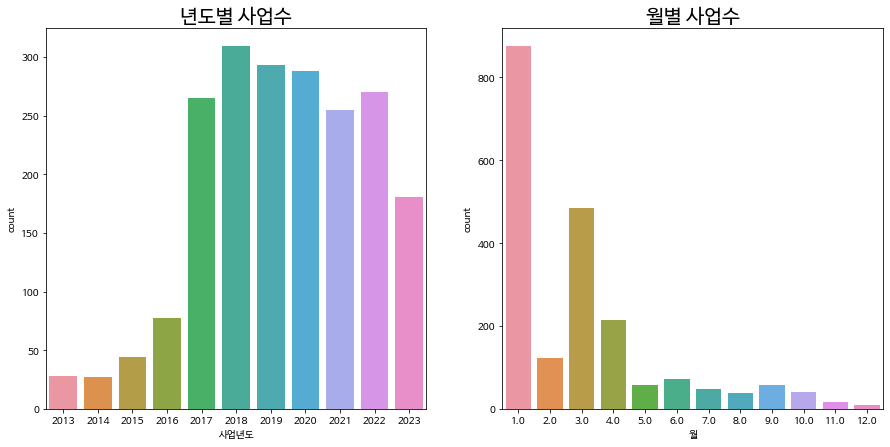

In [137]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(job['사업년도'])
plt.title('년도별 사업수',size=20)

plt.subplot(1,2,2)
sns.countplot(job['월'])
plt.title('월별 사업수',size=20)

plt.show()

- 뉴딜일자리 사업은 2017년에 급증하였으며, 2018년 이후 조금씩 감소하고 있는 추세이다.
- 또한, 상반기의 사업이 하반기의 사업보다 많았으며, 1월에 가장 사업이 많았다.

# 파트타임

파트타임 계획인원 평균 :  33.45명 

파트타임 선발인원 평균 :  10.66명 



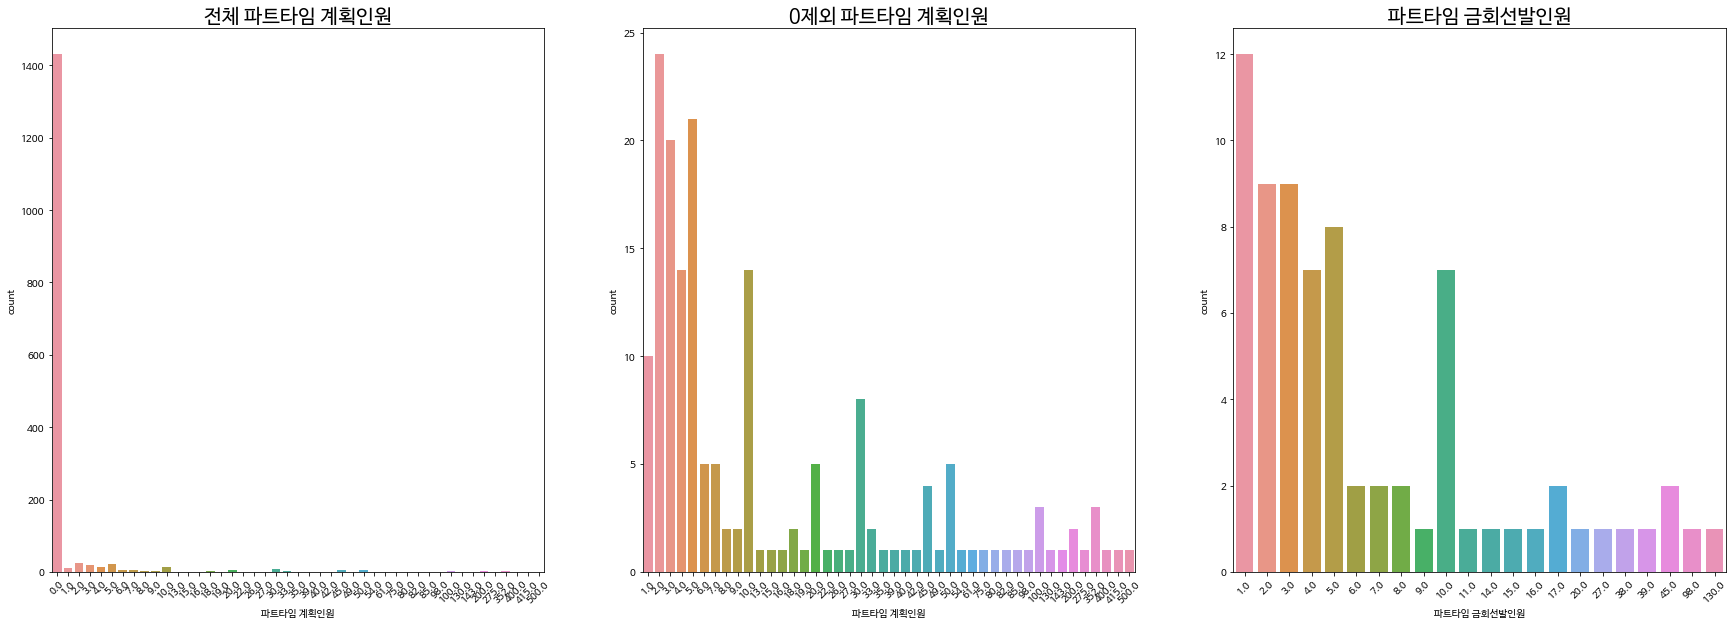

In [120]:
personnel = job[job['파트타임 계획인원'] > 0]
personnel2 = job[job['파트타임 금회선발인원'] > 0]
p1 = personnel['파트타임 계획인원'].mean()
p2 = personnel2['파트타임 금회선발인원'].mean()

print(f'파트타임 계획인원 평균 : {p1: .2f}명 \n')
print(f'파트타임 선발인원 평균 : {p2: .2f}명 \n')

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.countplot(job['파트타임 계획인원'])
plt.title('전체 파트타임 계획인원',size=20)
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.countplot(personnel['파트타임 계획인원'])
plt.title('0제외 파트타임 계획인원',size=20)
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.countplot(personnel2['파트타임 금회선발인원'])
plt.title('파트타임 금회선발인원',size=20)
plt.xticks(rotation=45)

plt.show()


- 파트타임 계획인원은 최소 0명부터 최대 500명까지 존재하였다.
- 사업 계획시 필요한 인원수를 정확히 파악하기 어렵기 때문에 0이 많이 나타난 것으로 생각된다.
- 또한, 파트타임 인원계획시 10명 혹은 5명 단위로 계획하는 경향이 있는 것으로 보인다.

- 파트타임 계획인원의 평균은 약 33명이지만, 선발인원의 평균은 약 11명으로 사업 계획시 실제 선발인원의 3배수를 계획하는 것으로 생각된다.



In [29]:
# 파트타임 계획인원이 100이상인 케이스 추출
job[job['파트타임 계획인원'] >= 100]

,파트타임 계획인원,파트타임 시급,사업년도,전일근무 일근로시간,전일근무 계획인원,근로기간 시작일자,전일근무 금회선발인원,하위사업분류,참여대상,사업목적,하위기관명,상위사업분류,상위기관명,부서명,전일근무 시급,파트타임 금회선발인원,파트타임 일근로시간,근로기간 종료일자,뉴딜사업명,사업유형,사업담당자 전화번호,근무조건,이런일을 합니다,월
30,100.0,11157.0,2023,0.0,0.0,20230401,NaN,사회복지·보육·상담,None,사업목적\r\n\r\n ○발달장애인 돌봄인력난 해소 및 발달장애인서비스 질 향상\r...,복지정책실,복지,본청,장애인복지정책과,0.0,NaN,6.0,20240331,발달장애인평생교육센터 돌봄지원 교사,시직접추진,02-2133-7446,근로기간 : 12개월(2023 4.1~2024.3.31.)\r\n근로시간 : 주 5...,발달장애인평생교육센터 내 기배치 종사자와 발달장애인 평생교육 및 돌봄서비스를 제공\...,04
73,200.0,11157.0,2023,0.0,0.0,20230401,NaN,사회복지·보육·상담,None,○ 목적 : 지역사회 내 우수한 아동돌봄 자원을 발굴하여 인력난을 겪고 있는 지역아...,여성가족정책실,복지,본청,아동담당관,11157.0,NaN,4.0,20240331,지역아동센터 아동복지전문가 운영,자치구추긴,02-2133-5181,○ 아동 학습지도 업무에 대한 전문 지식과 그 응용 능력 \r\n\r\n ○ 지역...,"○ 역할: 지역아동센터 아동의 서울런 학습 지원 및 집중돌봄필요아동 생활·학습지원,...",04
257,275.0,10770.0,2022,0.0,0.0,20220401,NaN,사회복지·보육·상담,일반,○ 사업목적 : 지역사회 내 우수한 아동돌봄 자원을 발굴하여 인력난을 겪고 있는 지...,여성가족정책실,복지,본청,아동담당관,0.0,NaN,4.0,20221130,지역아동센터 아동돌봄교사,자치구추긴,02-2133-5181,"8개월 / 주 20시간/ 주 5일 / 일급 43,080원","○ 역할 : 지역아동센터 아동 학습지원, 아동 생활지도 및 지역아동센터 운영 지원\...",04
470,100.0,10710.0,2021,0.0,0.0,20210401,NaN,사회복지·보육·상담,일반,○ 지역사회 내 우수한 아동돌봄 자원을 발굴하여 인력난을 겪고 있는 아동복지시설에 ...,여성가족정책실,복지,본청,가족담당관,0.0,NaN,4.0,20211130,아동복지시설 돌봄지원가,시직접추진,02-2133-5180,"8개월 / 주 20시간/ 주 5일 / 일급 42,840원",아동복지분야 아동양육시설의 담당자와 업무와 역할 논의 후 아동양육복지 증진을 위한 ...,04
472,200.0,10710.0,2021,0.0,0.0,20210401,NaN,사회복지·보육·상담,일반,○ 사업목적 : 지역사회 내 우수한 아동돌봄 자원을 발굴하여 인력난을 겪고 있는 지...,여성가족정책실,복지,본청,아이돌봄담당관,0.0,NaN,4.0,20211130,지역아동센터 아동돌봄교사,시직접추진,02-2133-7154,"8개월 / 주 20시간/ 주 5일 / 일급 42,840원",○ 역할 : 지역아동센터 아동 학습 관리\r\n○ 직무역량 : 학습지도에 대한 전문...,04
791,100.0,10710.0,2020,0.0,0.0,20200401,NaN,사회복지·보육·상담,일반,★사업목적\r\n○ 지역사회 내 우수 아동돌봄 자원 발굴\r\n○ 아동양육시설의 법...,여성가족정책실,복지,본청,가족담당관,0.0,NaN,4.0,20201130,아동복지시설 돌봄지원가,자치구추긴,02-2133-5180,"○ 8개월 / 주 20시간 / 일급 42,120원",○ 역할 : 아동복지분야 아동양육시설의 담당자와 업무와 역할 논의 후 아동양육복지 ...,04
793,352.0,10530.0,2020,0.0,0.0,20200401,NaN,사회복지·보육·상담,일반,\r\n*사업목적 \r\n 지역사회 내 우수한 아동돌봄 자원을 발굴하여 인력난을 ...,여성가족정책실,복지,본청,아이돌봄담당관,0.0,NaN,4.0,20201130,지역아동센터 아동돌봄 교사,자치구추긴,02-2133-4945,"o 근무시간 : 일 4시간, 주 20시간 근무 (8개월)\r\no 교육 : 근무기간...",o 역할 : 지역아동센터 아동 학습 지원\r\no 직무역량 : 학습지도에 대한 전문...,04
1060,130.0,10150.0,2019,0.0,0.0,20190502,NaN,사회복지·보육·상담,일반,★사업목적\r\n○ 지역사회 내 우수 아동돌봄 자원 발굴\r\n○ 아동양육시설의 법...,여성가족정책실,복지,본청,가족담당관,0.0,NaN,4.0,20191231,아동복지시설 양육돌보미,자치구추긴,02-2133-5189,"○ 8개월 / 주 20시간 / 일급 40,600원","○ 아동복지시설 내 양육, 조리, 행정인력 지원",05
1062,352.0,10150.0,2019,0.0,0.0,20190401,NaN,사회복지·보육·상담,일반,\r\n*사업목적 \r\n 지역사회 내 우수한 아동돌봄 자원을 발굴하여 인력난을 ...,여성가족정책실,복지,본청,아이돌봄담당관 돌봄정책팀,0.0,NaN,4.0,20191129,지역아동센터 아동돌봄 교사,자치구추긴,02-2133-4815,"○ 참여대상 : 일반 (만18세 이상~)\r\n ○ 근로조건 : 주5일, 1일4시...",* 지역아동센터의 아동 학습지도\r\n ○ 기초학습 및 전공관련 분야 학습 지도\r...,04
1414,352.0,9220.0,2018,0.0,0.0,20180402,352.0,사회복지·보육·상담,일반,지역사회 내 우수한 아동돌봄 자원을 발굴하여 인력난을 겪고 있는 지역아동센터에 지...,여성가족정책실,복지,본청,가족담당관 가족지원팀,0.0,NaN,4.0,20181130,지역아동센터 아동돌봄 도우미,시직접추진,02-2133-5184,○ 참여대상 : 만 18세 이상의 서울시민으로서 사업 참여배제 사유가 없는 자 \r...,지역사회 아동복지를 책임지고 있는 지역아동센터에 양질의 아동복지 서비스 제공과 안정...,04


- 파트타임 계획인원이 100명 이상인 사업은 대부분 아동 돌봄 사업으로, 아동돌봄에 많은 인원이 투입되고 있다.
- 특히 여성가족정책실에서 진행하는 지역사회 내 우수한 아동돌봄 자원 발굴 사업이 가장 많았으며, 이는 2018년 이후 매년 시행하고 있는 것으로 보인다.

파트타임 일 근로시간 :  5.97시간 



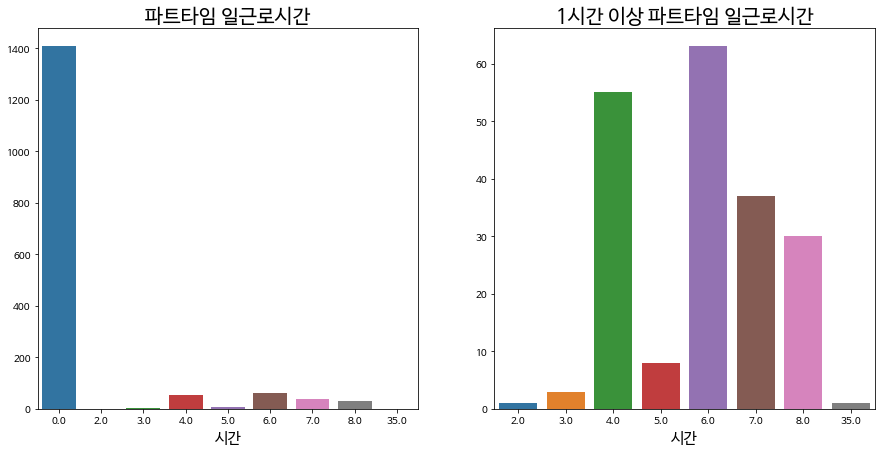

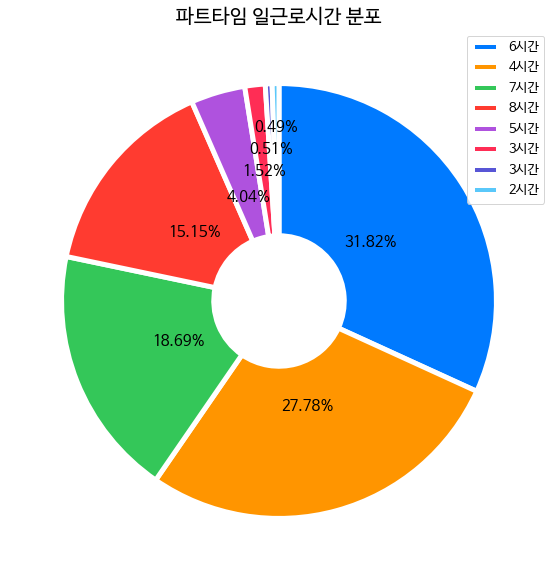

In [167]:
day_wh = job[job['파트타임 일근로시간'] > 0]
time_mean = day_wh['파트타임 일근로시간'].mean()
print(f'파트타임 일 근로시간 : {time_mean : .2f}시간 \n')

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(job['파트타임 일근로시간'])
plt.title('파트타임 일근로시간',size=20)
plt.xlabel('시간',size=15)
plt.ylabel('')

plt.subplot(1,2,2)
sns.countplot(day_wh['파트타임 일근로시간'])
plt.title('1시간 이상 파트타임 일근로시간',size=20)
plt.xlabel('시간',size=15)
plt.ylabel('')

pie_plot(day_wh['파트타임 일근로시간'].value_counts(),
        [str(i)[:1] + '시간' for i in day_wh['파트타임 일근로시간'].value_counts().index],
        light_palette,
        '파트타임 일근로시간 분포')

plt.show()

- 파트타임 계획인원과 마찬가지로 근로시간에서도 0이 많이 나타났다.
- 0을 제외한 근로시간에서 6시간이 31.82%로 가장 많았으며, 파트타임의 평균 일근로시간은 약 6시간이다.

2013~2023 최저 시급 평균:  8059
파트타임 평균 시급 :  10125 



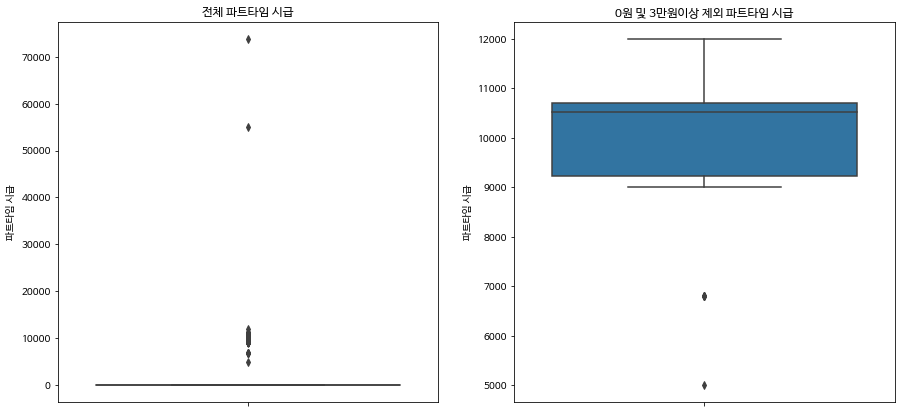

In [126]:
hourly = job[(job['파트타임 시급'] > 0) & (job['파트타임 시급'] <= 30000)]
hour_cost = hourly['파트타임 시급'].mean()

cost_list = [9620,9160,8720,8590,8350,7530,6470,6030]

print(f'2013~2023 최저 시급 평균: {np.mean(cost_list) : .0f}')
print(f'파트타임 평균 시급 : {hour_cost : .0f} \n')

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(y=job['파트타임 시급'])
plt.title('전체 파트타임 시급')

plt.subplot(1,2,2)
sns.boxplot(y=hourly['파트타임 시급'])
plt.title('0원 및 3만원이상 제외 파트타임 시급')

plt.show()


- 파트타임 시급은 0 ~ 73760원이었으며, 파트타임 계획인원과 마찬가지로 0이 많이 존재하였다.
- 55000원과 73760원의 시급이 존재하였는데, 이는 일급을 시급으로 기입한 것으로 생각된다.
- 파트타임 시급평균은 10125원으로, 2018~2023년의 최저 시급 평균인 8059원보다 약 2000원가량 높다.

# 전일근무

전일근무 계획인원 평균 :  12.92명 

전일근무 선발인원 평균 :  8.65명 



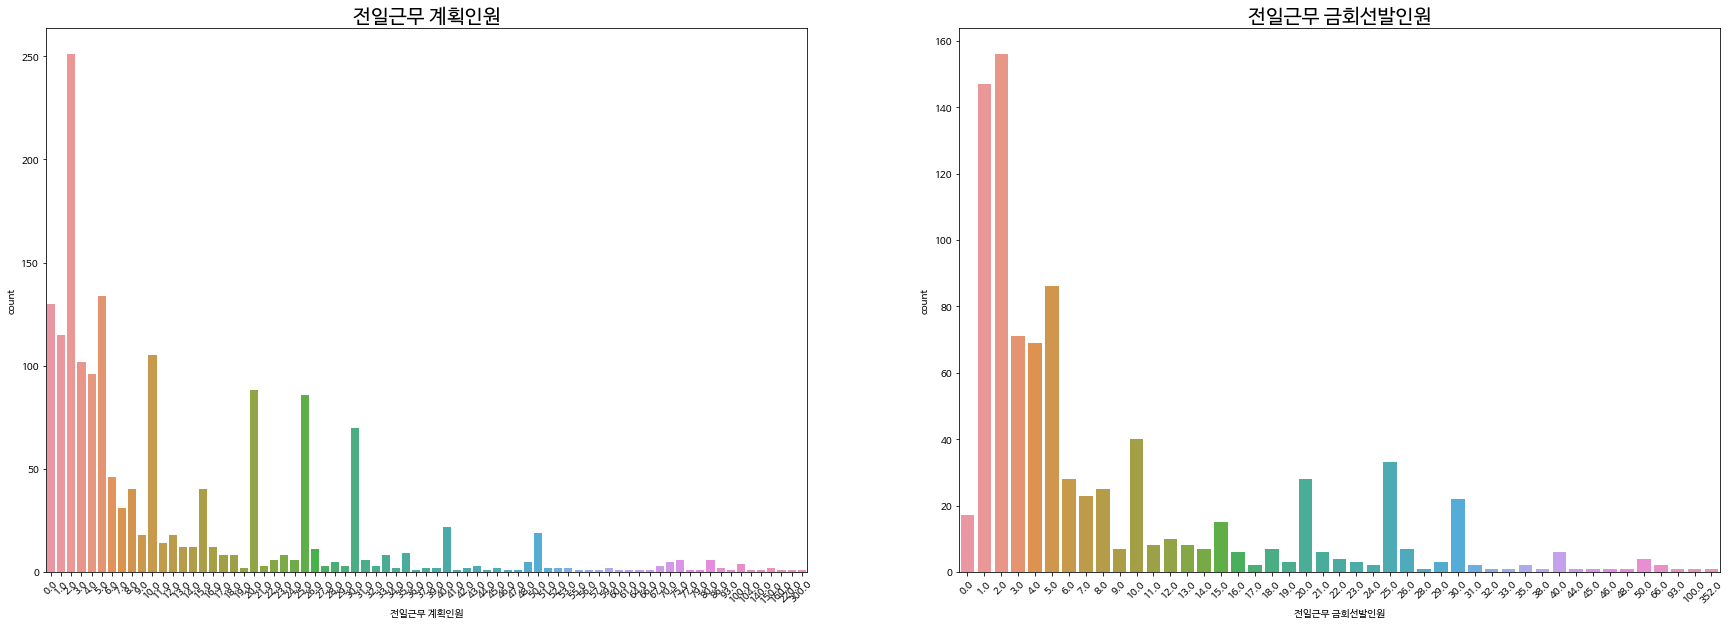

In [143]:
p1 = job['전일근무 계획인원'].mean()
p2 = job['전일근무 금회선발인원'].mean()

print(f'전일근무 계획인원 평균 : {p1: .2f}명 \n')
print(f'전일근무 선발인원 평균 : {p2: .2f}명 \n')

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(job['전일근무 계획인원'])
plt.title('전일근무 계획인원',size=20)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(job['전일근무 금회선발인원'])
plt.title('전일근무 금회선발인원',size=20)
plt.xticks(rotation=45)

plt.show()


- 전일근무 계획인원은 최소 0명부터 최대 300명까지 존재했다.
- 전일근무 또한 파트탕미과 같이 10명 혹은 5명 단위로 계획하는 경향이 있는 것으로 보인다.

- 전일근무 계획인원의 평균은 약 13명이지만, 선발인원의 평균은 약 9명으로 계획인원의 약 3/4가 선발되며, 계획인원대비 선발인원이 파트타임보다 많았다.



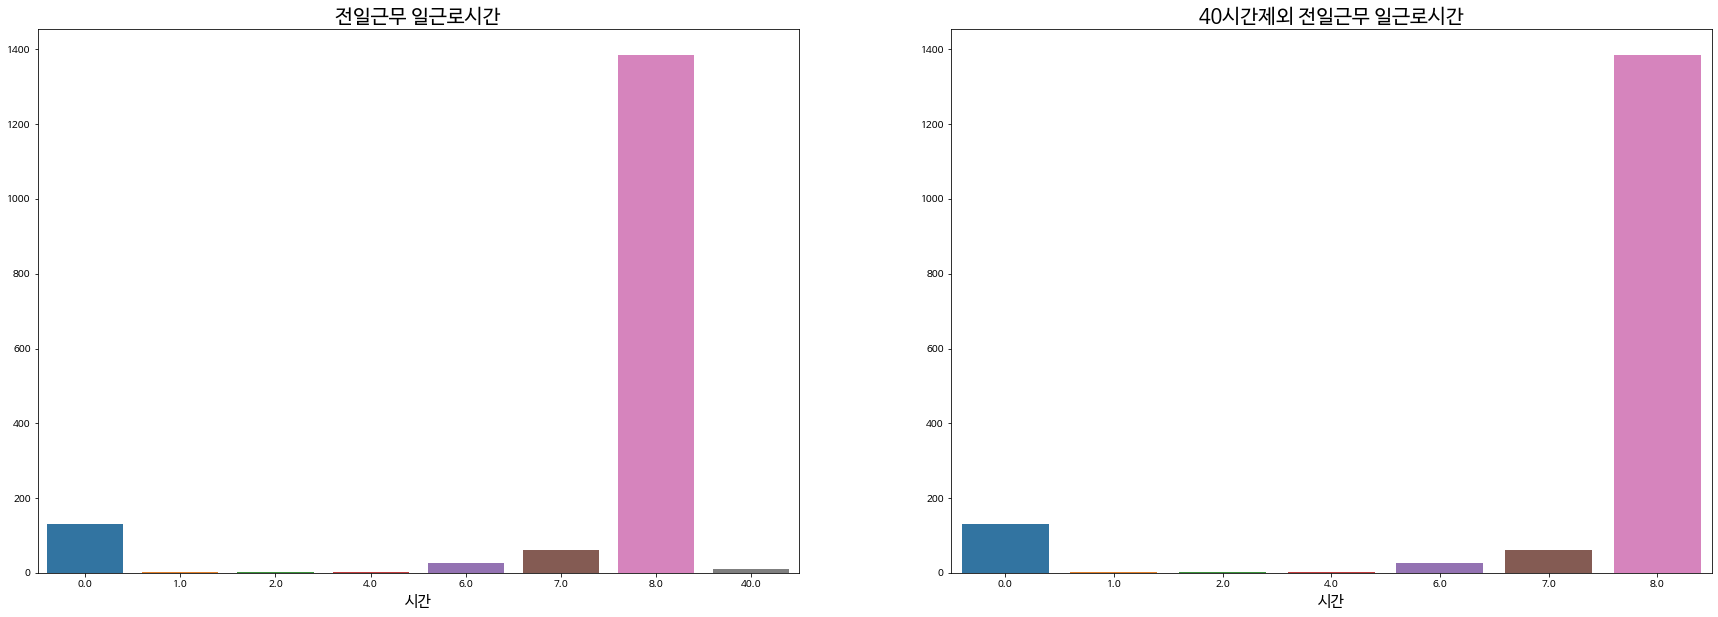

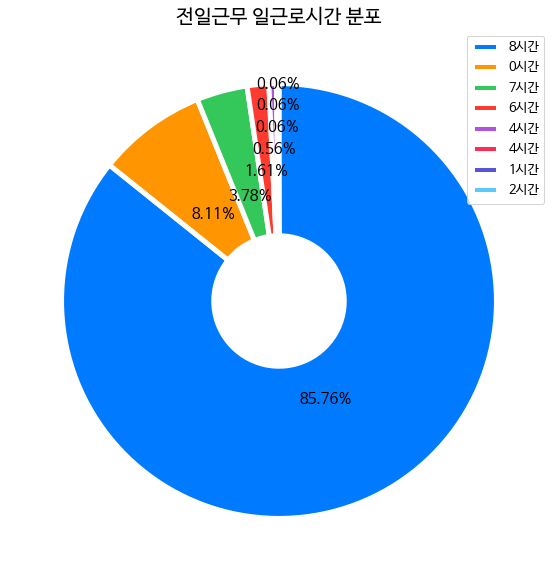

In [168]:
day_wh = job[job['전일근무 일근로시간'] < 40]

plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
sns.countplot(job['전일근무 일근로시간'])
plt.title('전일근무 일근로시간',size=20)
plt.xlabel('시간',size=15)
plt.ylabel('')

plt.subplot(1,2,2)
sns.countplot(day_wh['전일근무 일근로시간'])
plt.title('40시간제외 전일근무 일근로시간',size=20)
plt.xlabel('시간',size=15)
plt.ylabel('')

pie_plot(job['전일근무 일근로시간'].value_counts(),
        [str(i)[:1] + '시간' for i in job['전일근무 일근로시간'].value_counts().index],
        light_palette,
        '전일근무 일근로시간 분포')

plt.show()

- 전일근무 일근로시간은 0~40시간까지의 데이터가 존재하였으며, 전체의 약 86%가 8시간으로 나타났다.
- 근로시간이 0인 데이터는 아직 미정인 경우이며, 40시간은 한 주의 근로시간을 잘못 기입한 것으로 생각된다.

2013~2023 최저 시급 평균:  8059
전일근무 평균 시급 :  10384 



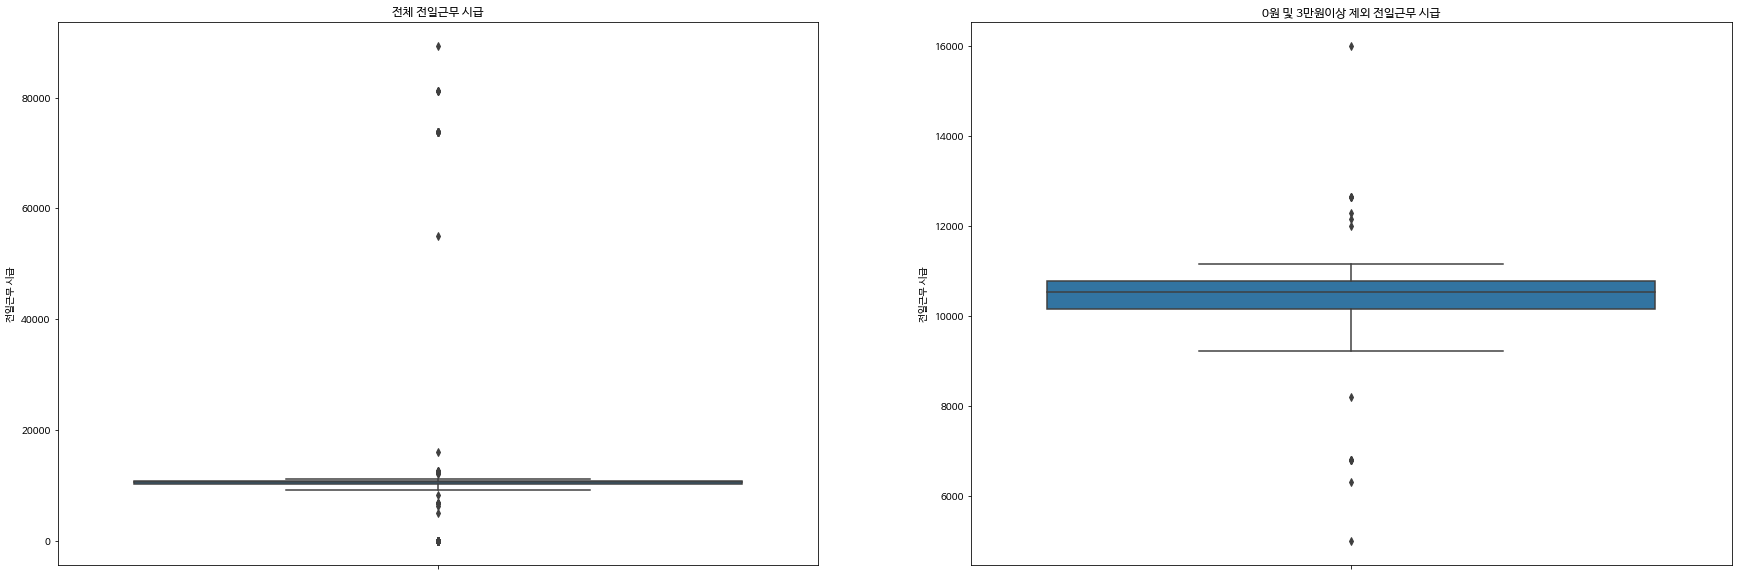

In [151]:
hourly = job[(job['전일근무 시급'] > 0) & (job['전일근무 시급'] <= 30000)]
hour_cost = hourly['전일근무 시급'].mean()

cost_list = [9620,9160,8720,8590,8350,7530,6470,6030]

print(f'2013~2023 최저 시급 평균: {np.mean(cost_list) : .0f}')
print(f'전일근무 평균 시급 : {hour_cost : .0f} \n')

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.boxplot(y=job['전일근무 시급'])
plt.title('전체 전일근무 시급')

plt.subplot(1,2,2)
sns.boxplot(y=hourly['전일근무 시급'])
plt.title('0원 및 3만원이상 제외 전일근무 시급')

plt.show()


- 전일근무 시급은 0 ~ 89256원까지 존재하였으며, 시급이 아닌 일급으로 보이는 데이터들이 존재하였다.

- 전일근무 시급의 평균은 10384원으로, 2018~2023년의 최저 시급 평균인 8059원보다 약 2300원가량 높다.

# 참여대상 및 사업분류

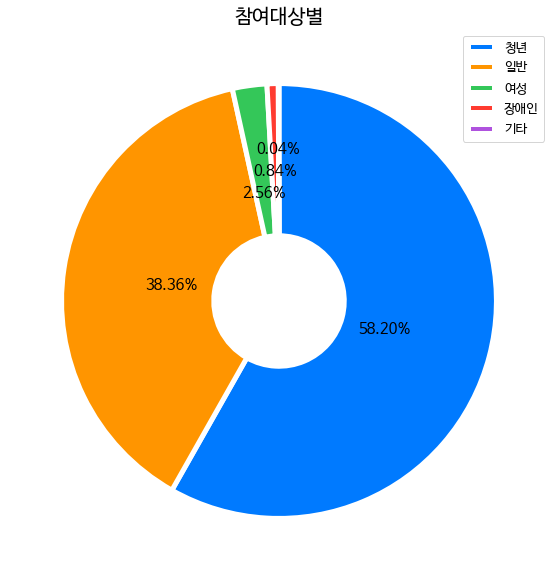

In [172]:
pie_plot(job['참여대상'].value_counts(),job['참여대상'].value_counts().index,light_palette,'참여대상별')

- 참여대상은 청년이 58.2%, 일반이 38.36%를 보이며 청년과 일반인을 대상으로 하는 사업이 대부분이었다.

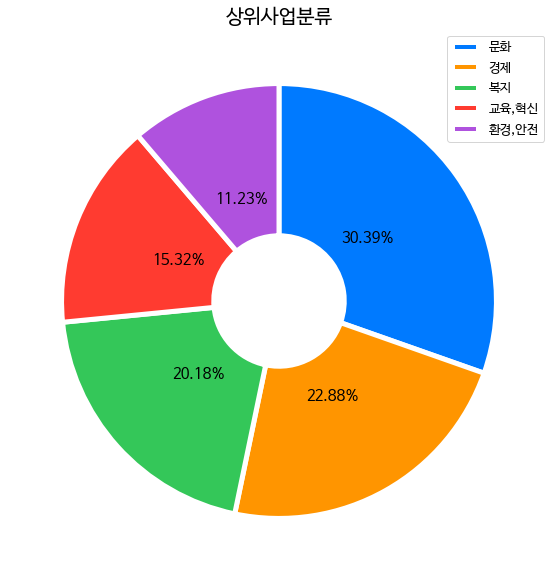

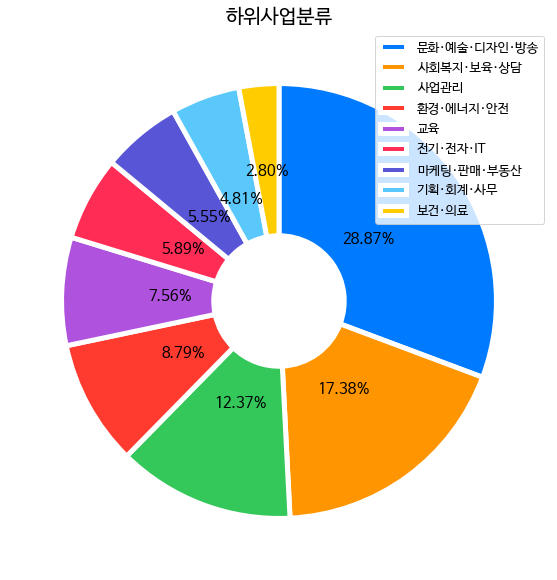

In [179]:
pie_plot(job['상위사업분류'].value_counts(),job['상위사업분류'].value_counts().index,light_palette,'상위사업분류')
pie_plot(job['하위사업분류'].value_counts(),job['하위사업분류'].value_counts().index,light_palette,'하위사업분류')

- 뉴딜 일자리 사업은 문화사업이 30.39%로 가장 많았으며, 환경및안전이 11.23%로 가장 적었다.
- 상위분류와 마찬가지로 하위분류 역시 문화·예술·디자인·방송분야의 사업이 28.87%로 가장 많았으며, 보건/의료 분야가 2.8%로 가장 적었다.

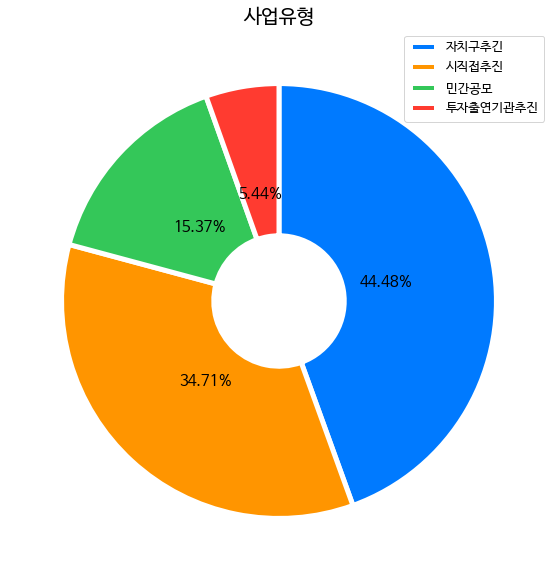

In [181]:
pie_plot(job['사업유형'].value_counts(),job['사업유형'].value_counts().index,light_palette,'사업유형')

- 뉴딜 일자리사업의 약 79%는 자치구와 시가 추진하는 사업이었으며, 민간공모와  투자출연기관추진이 각각 15.37%, 5.44%로 나타났다.

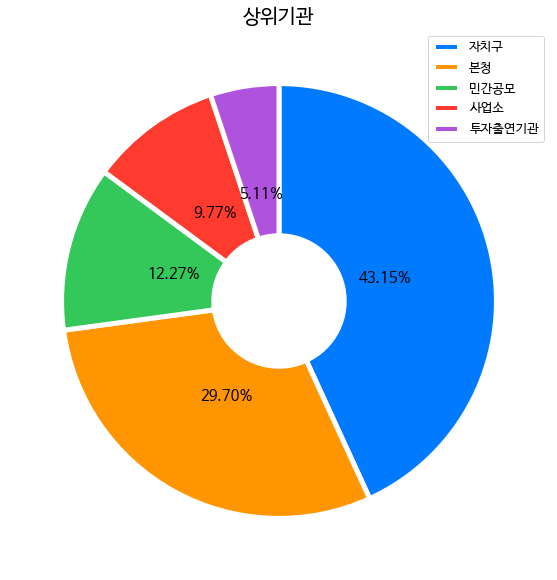

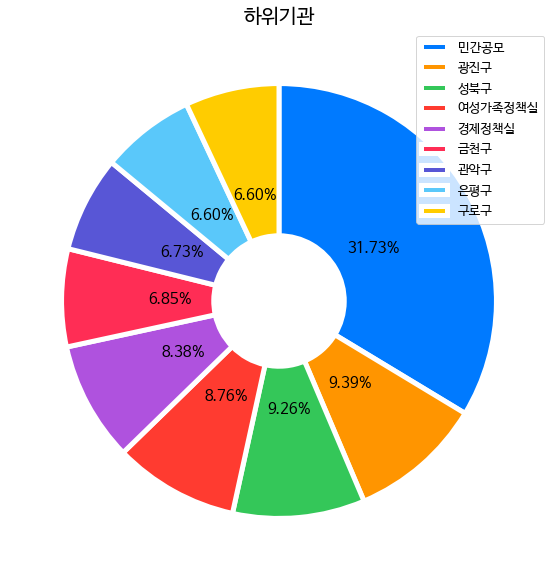

In [182]:
pie_plot(job['상위기관명'].value_counts()[:10],job['상위기관명'].value_counts()[:10].index,light_palette,'상위기관')
pie_plot(job['하위기관명'].value_counts()[:10],job['하위기관명'].value_counts()[:10].index,light_palette,'하위기관')

- 뉴딜 일자리 사업은 약% 73%가 자치구와 본청을 상위기관으로 두고 있으며, 민간공모는 12.27%로 나타났다.
- 하위기관으로는 민간공모가 31.73%로 가장 많았고, 각 자치구와 본청들이 그 뒤를 이었다. 

# 그룹별 시각화
- 년도별 파트타임 및 전일근무의 인원/시급/근로시간 평균은?

- 년도별 참여대상 및 사업분류의 변화는?

- 참여대상별 파트타임/전일근무 형태와 사업분류 형태는?

- 사업분류별 파트타임/전일근무 형태는?



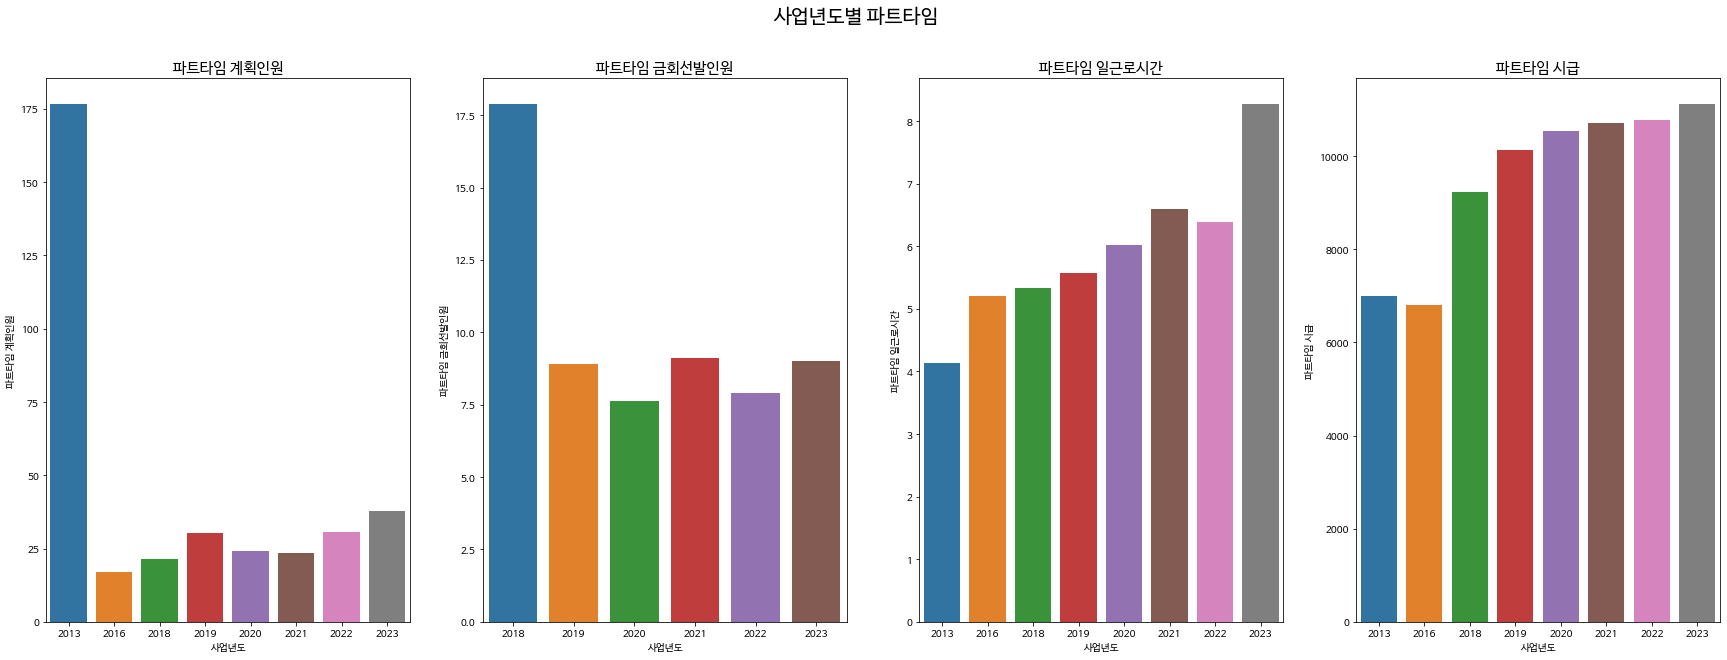

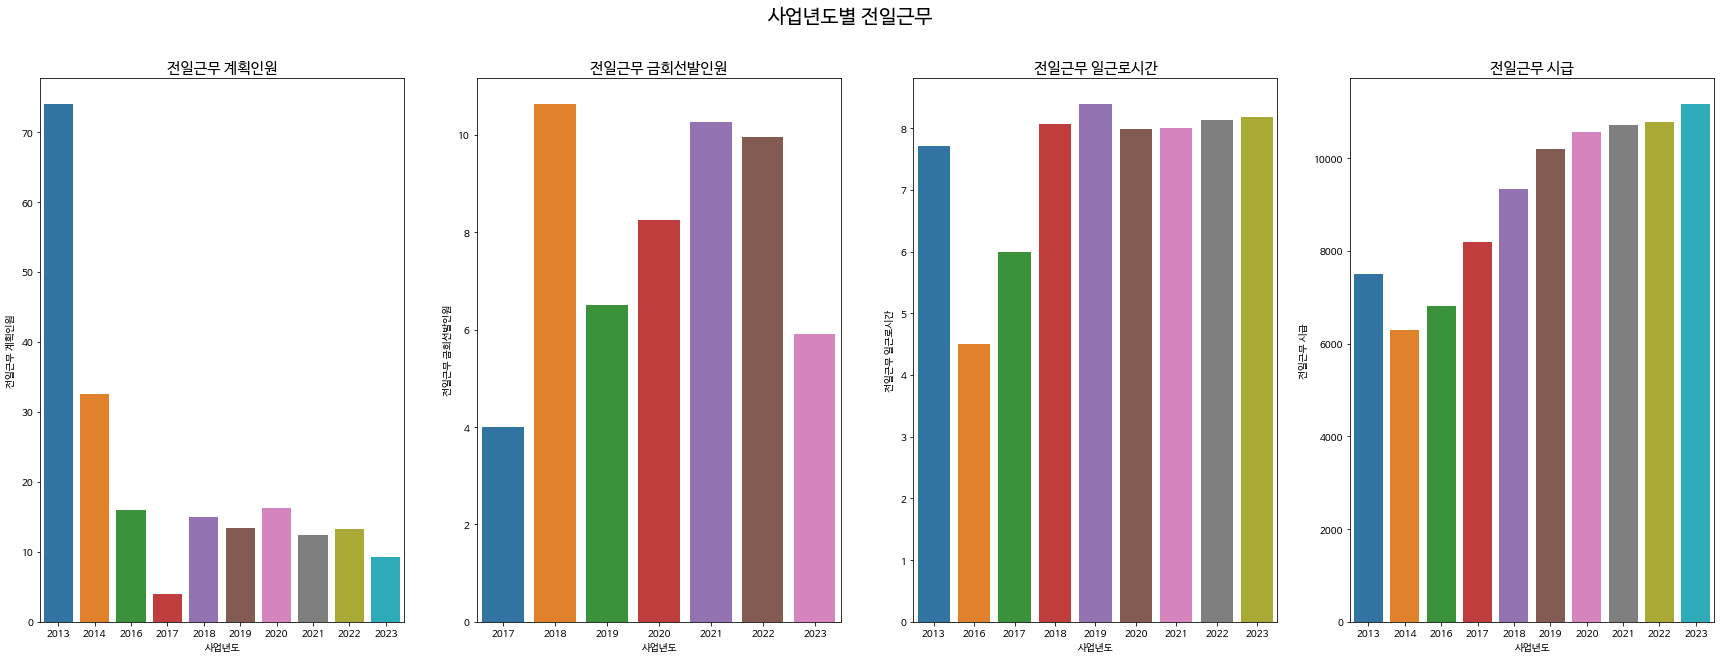

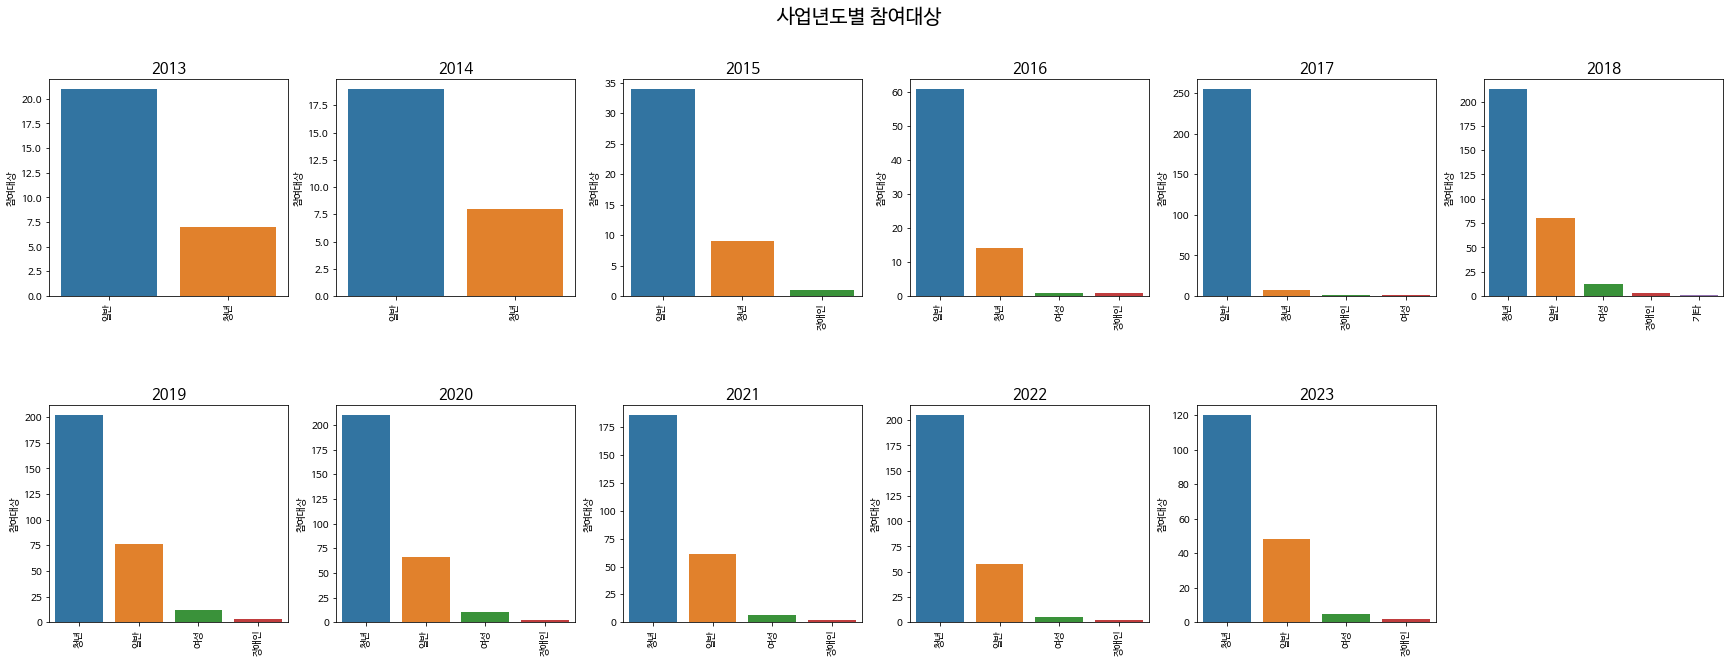

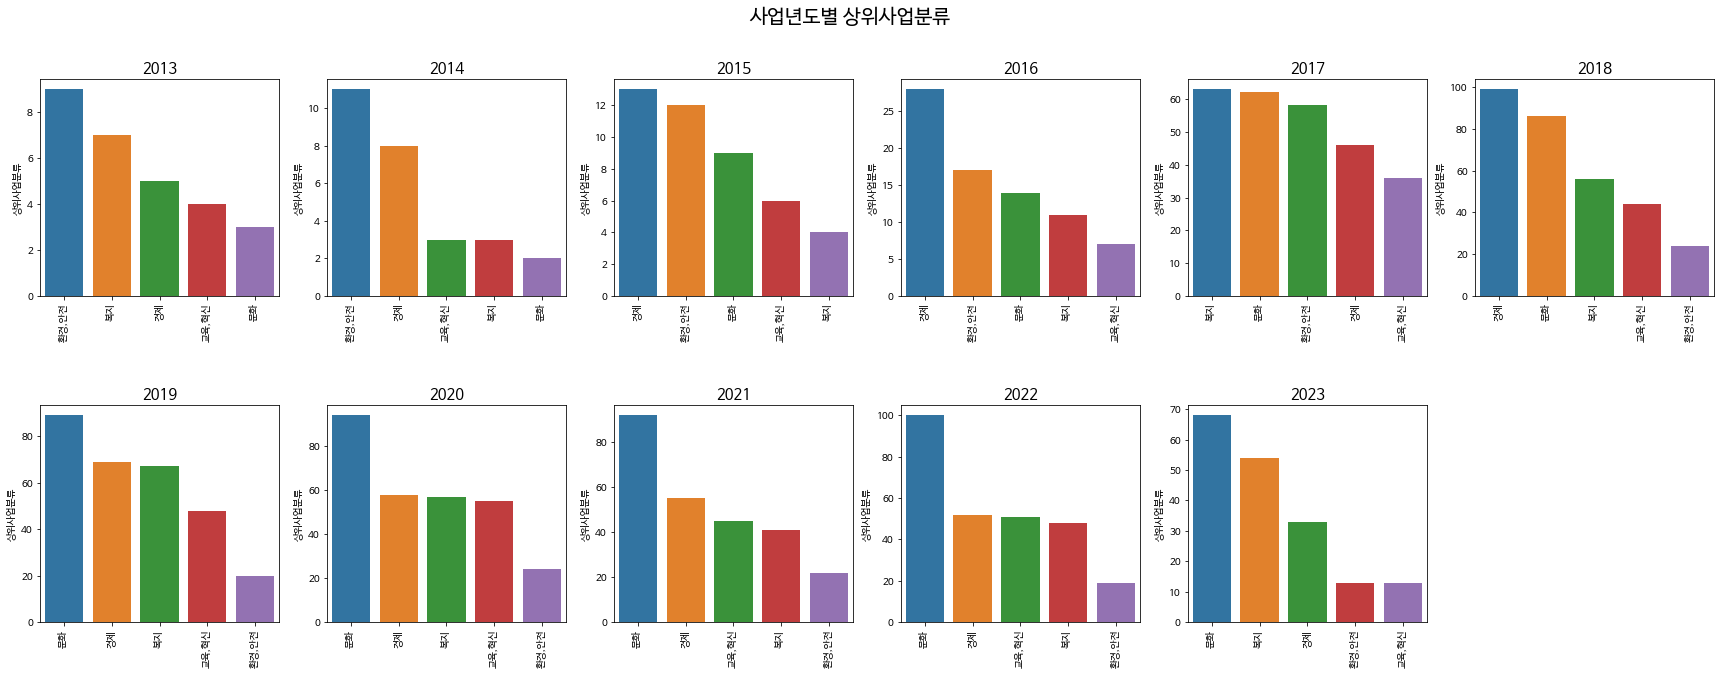

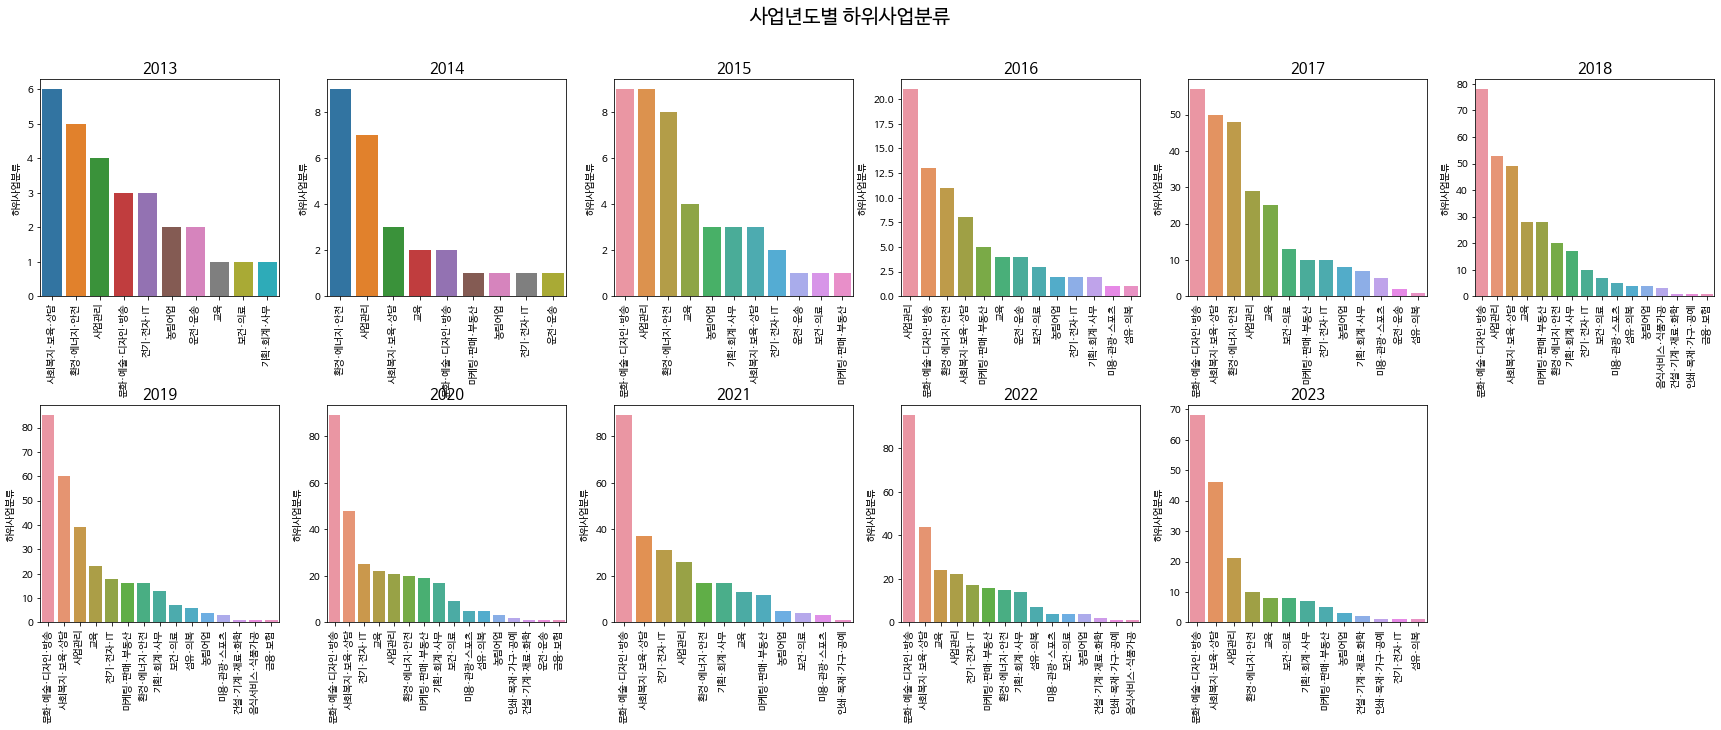

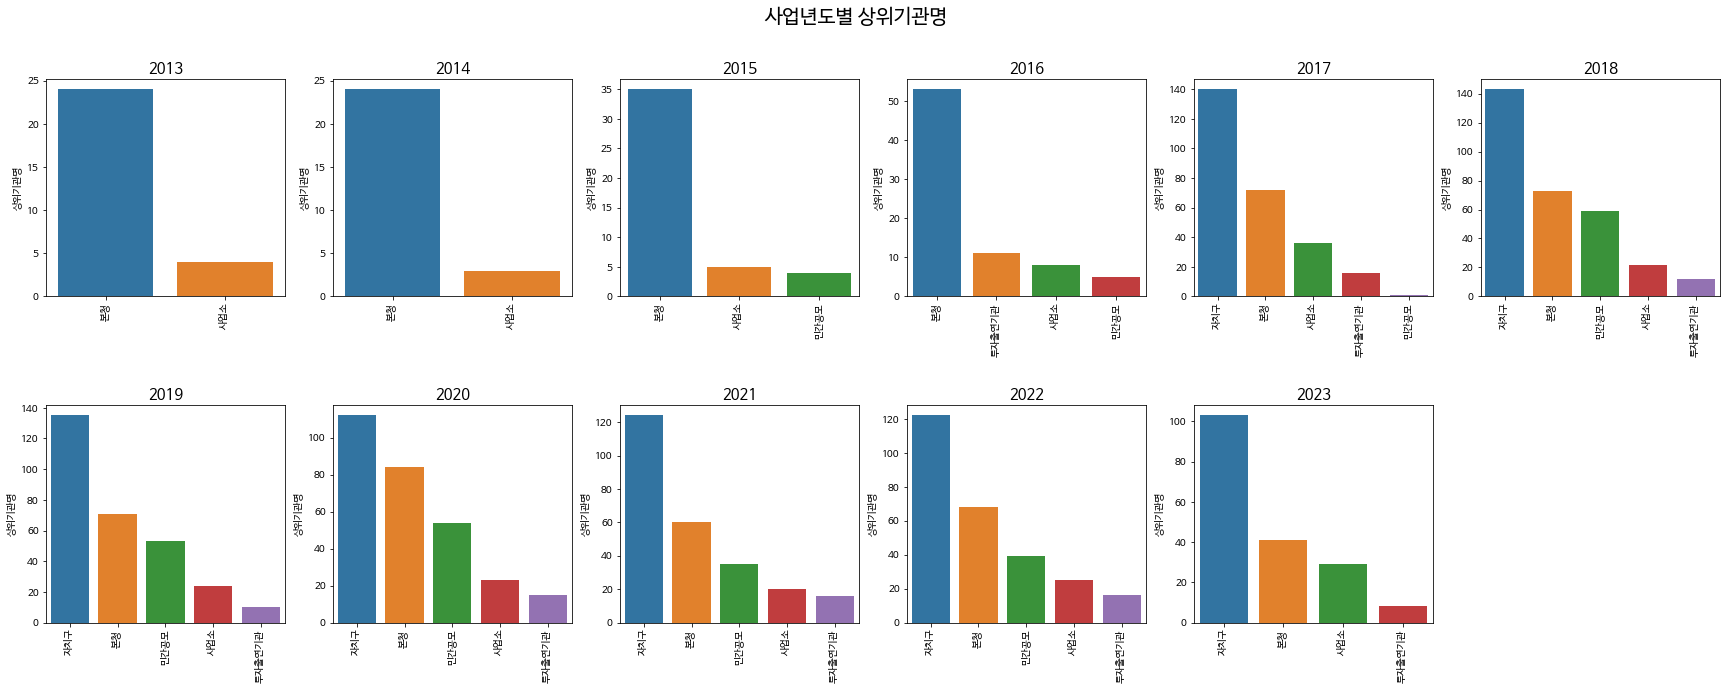

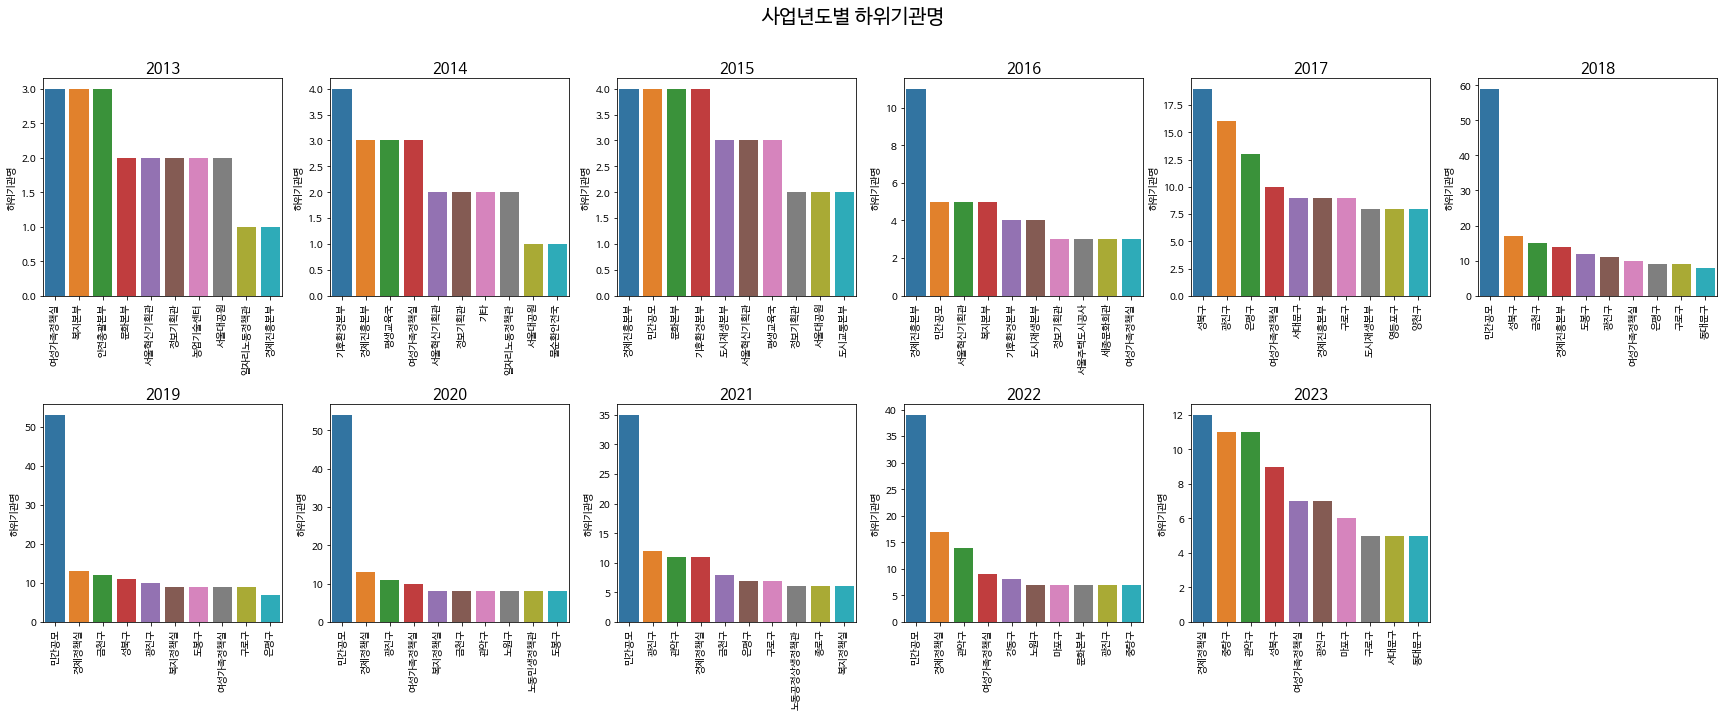

In [264]:
def num_plot(group_col , col_list):
  plt.figure(figsize=(30,10))
  if col_list == part:
    name = '파트타임'
  elif col_list == day:
    name = '전일근무'
  
  for i in range(len(col_list)):
    df = job[(job[col_list[i]] > 0) & (job[col_list[i]] < 30000)].groupby(group_col).mean()

    plt.subplot(1,len(col_list),i+1)
    sns.barplot(x = df.index , y = df[col_list[i]])
    plt.title(col_list[i],size=15)

  plt.suptitle(f'{group_col}별 {name}',size=20)
  plt.show()


def obj_plot(group_col,col_list):
  try:
    group_list = list(job[group_col].unique()[::-1])
    group_list.remove(None)
  except:
    group_list = list(job[group_col].unique()[::-1])
    
  for col in col_list:
    plt.figure(figsize=(30,10))
    plt.subplots_adjust(hspace=0.5)
    for i in range(len(group_list)):
      df = job[job[group_col] == group_list[i]]

      plt.subplot(2,len(group_list)//2 + 1,i+1)
      if col == '하위기관명':
        sns.barplot(x=df[col].value_counts().index[:10],y=df[col].value_counts()[:10])
      else:
        sns.barplot(x=df[col].value_counts().index,y=df[col].value_counts())
      
      plt.xticks(rotation=90)
      plt.title(group_list[i],size=15)

    plt.suptitle(f'{group_col}별 {col}',size=20)
    plt.show()

part = ['파트타임 계획인원','파트타임 금회선발인원','파트타임 일근로시간','파트타임 시급']
num_plot('사업년도',part)

day = ['전일근무 계획인원','전일근무 금회선발인원','전일근무 일근로시간','전일근무 시급']
num_plot('사업년도',day)

b_type = ['참여대상','상위사업분류','하위사업분류','상위기관명','하위기관명']
obj_plot('사업년도',b_type)

- 년도별 파트타임 선발인원은 평균 8명으로 어느정도 유지되고 있지만, 전일근무의 경우 2023년의 선발인원이 줄어 파트타임보다 적어진 것을 볼 수 있다.

- 파트타임의 년도별 근로시간을 보면 2023년에 전일근무와 비슷한 8시간으로 맞춰지고 있다.

- 년도별 시급은 파트타임/전일근무 모두 오르고 있으며, 2023년에는 비싸진 인건비의 영향으로 전일근무보다는 유동적으로 인력을 사용할 수 있는 파트타임의 인원을 더 선발하고 있는 것으로 생각된다.

- 참여대상은 2018년부터 청년의 수가 급격하게 증가하여 2023년까지 청년을 대상으로한 사업이 대부분인 것을 볼 수 있다.

- 사업분류 또한 2018년을 기점으로 문화분야의 사업이 크게 증가하였으며, 2023년에는 경제분야의 사업이 줄어들고 복지분야의 사업이 늘어났다.

- 사업 추진기관에서는 2017년부터 자치구에서 사업을 추진하기 시작하였고, 이는 2023년까지 많은 비중을 차지하고 있다.

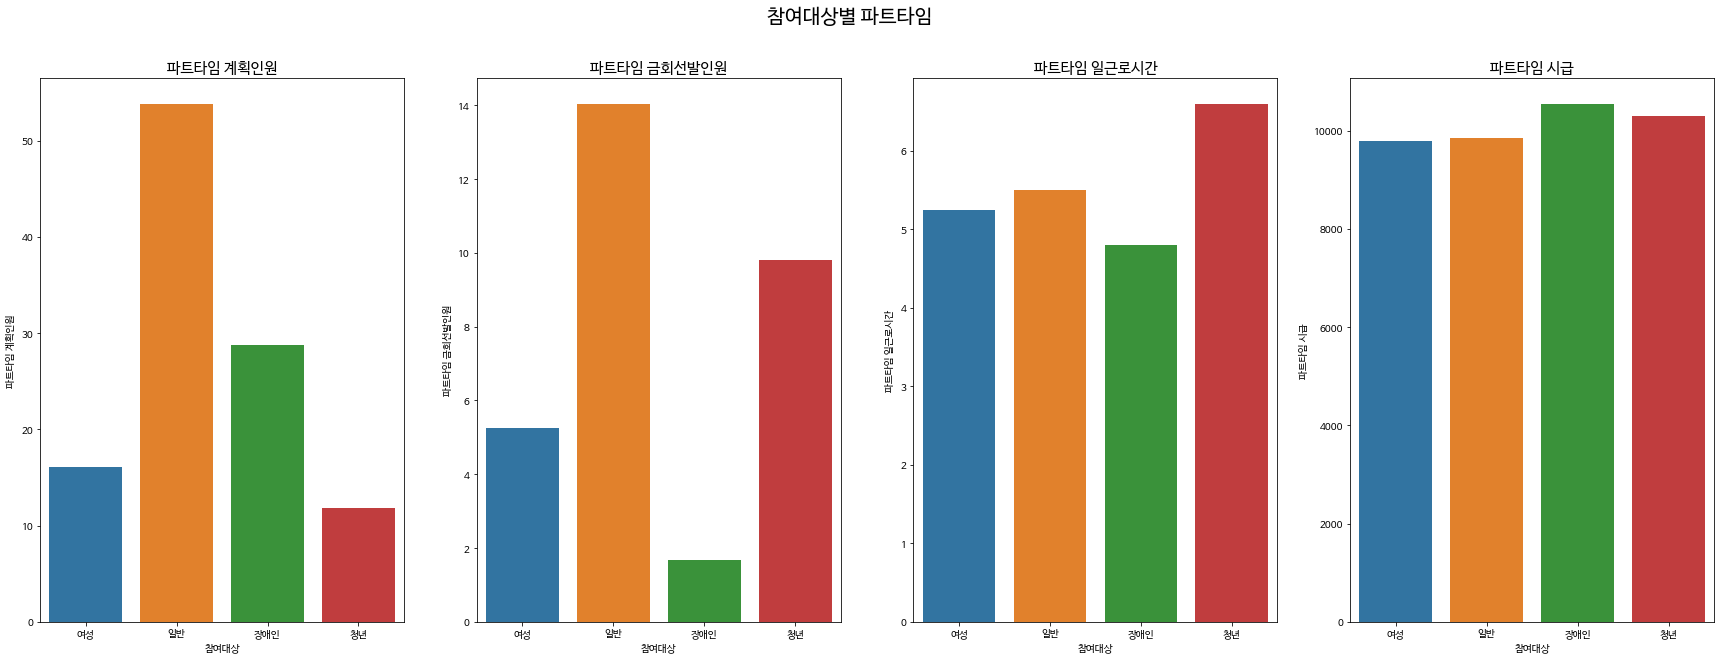

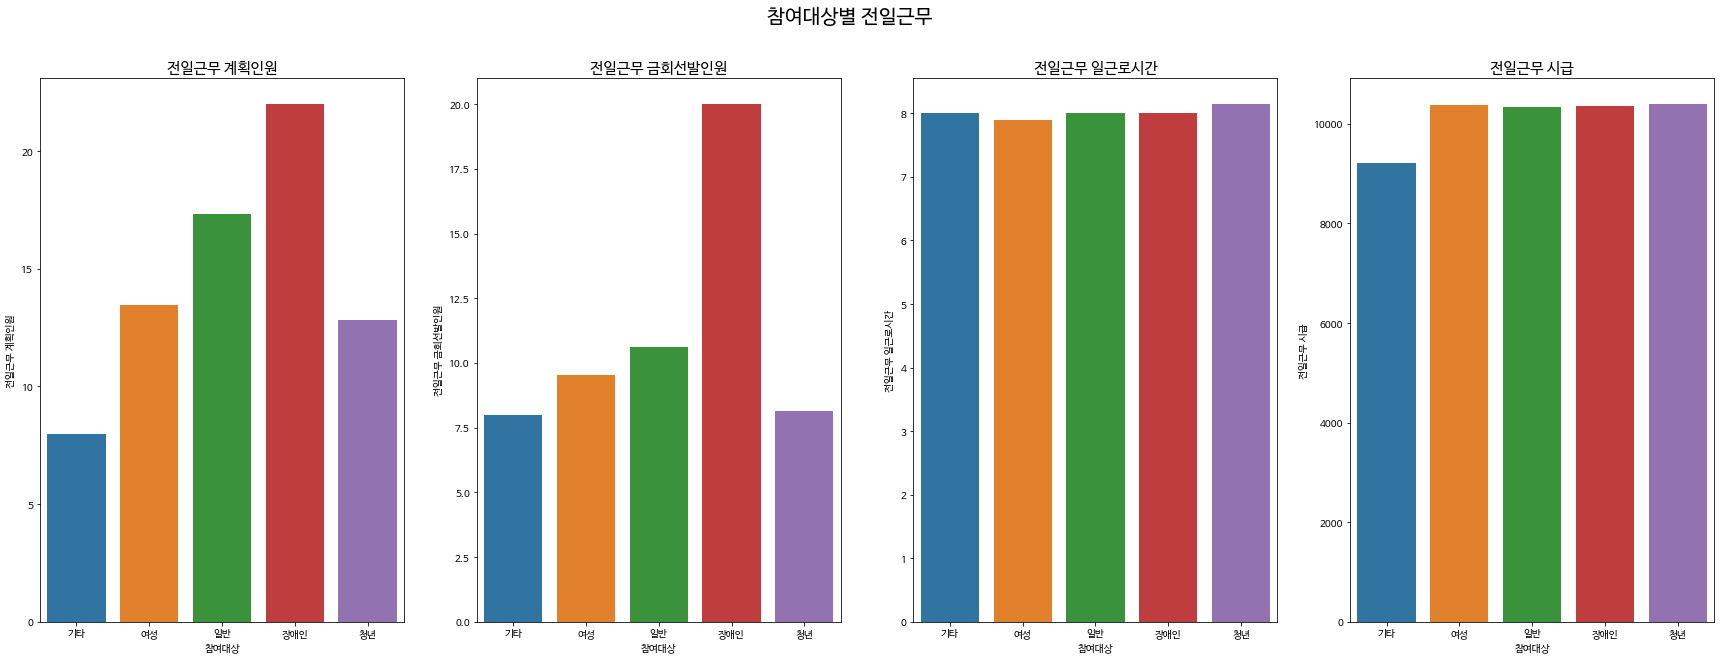

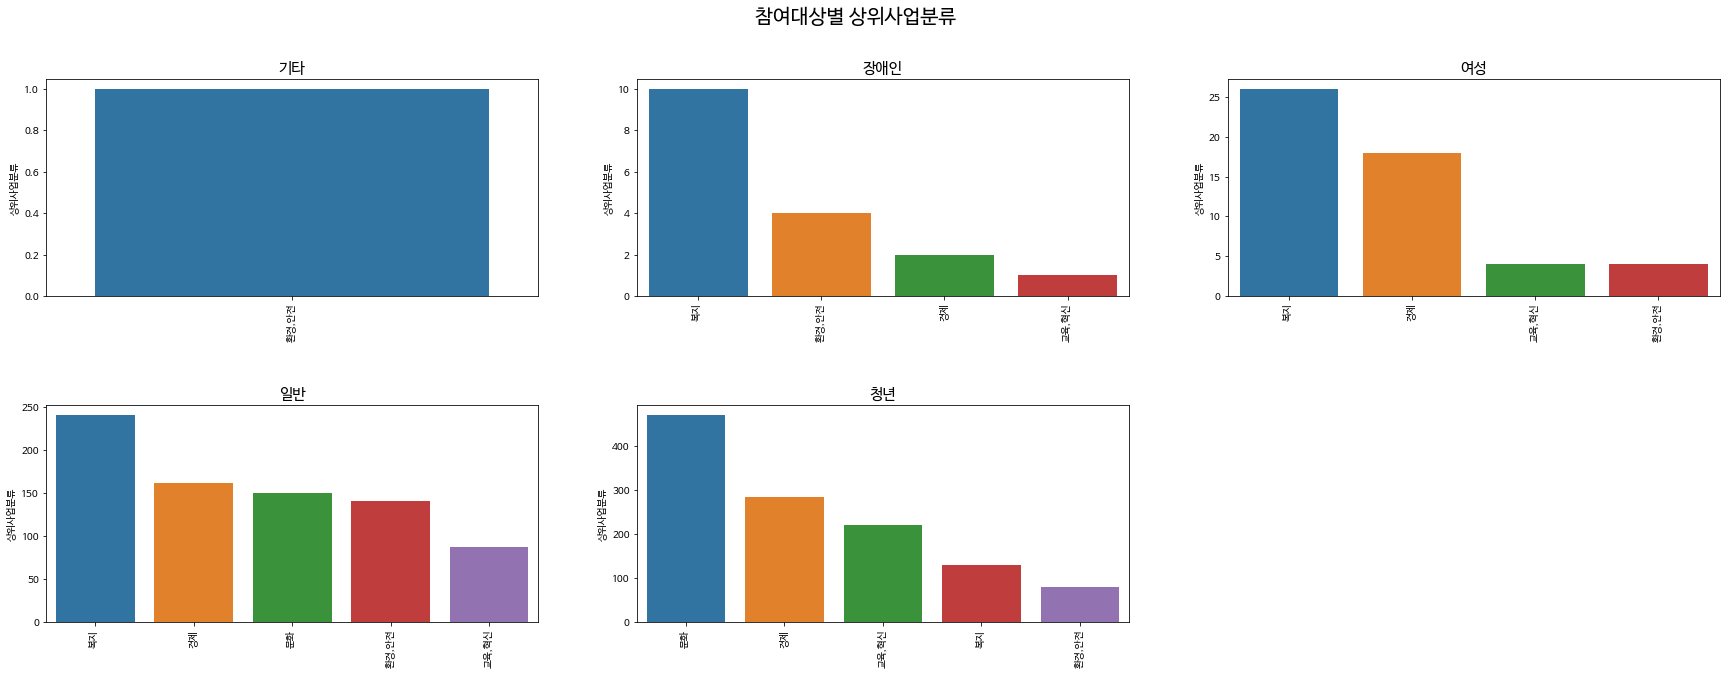

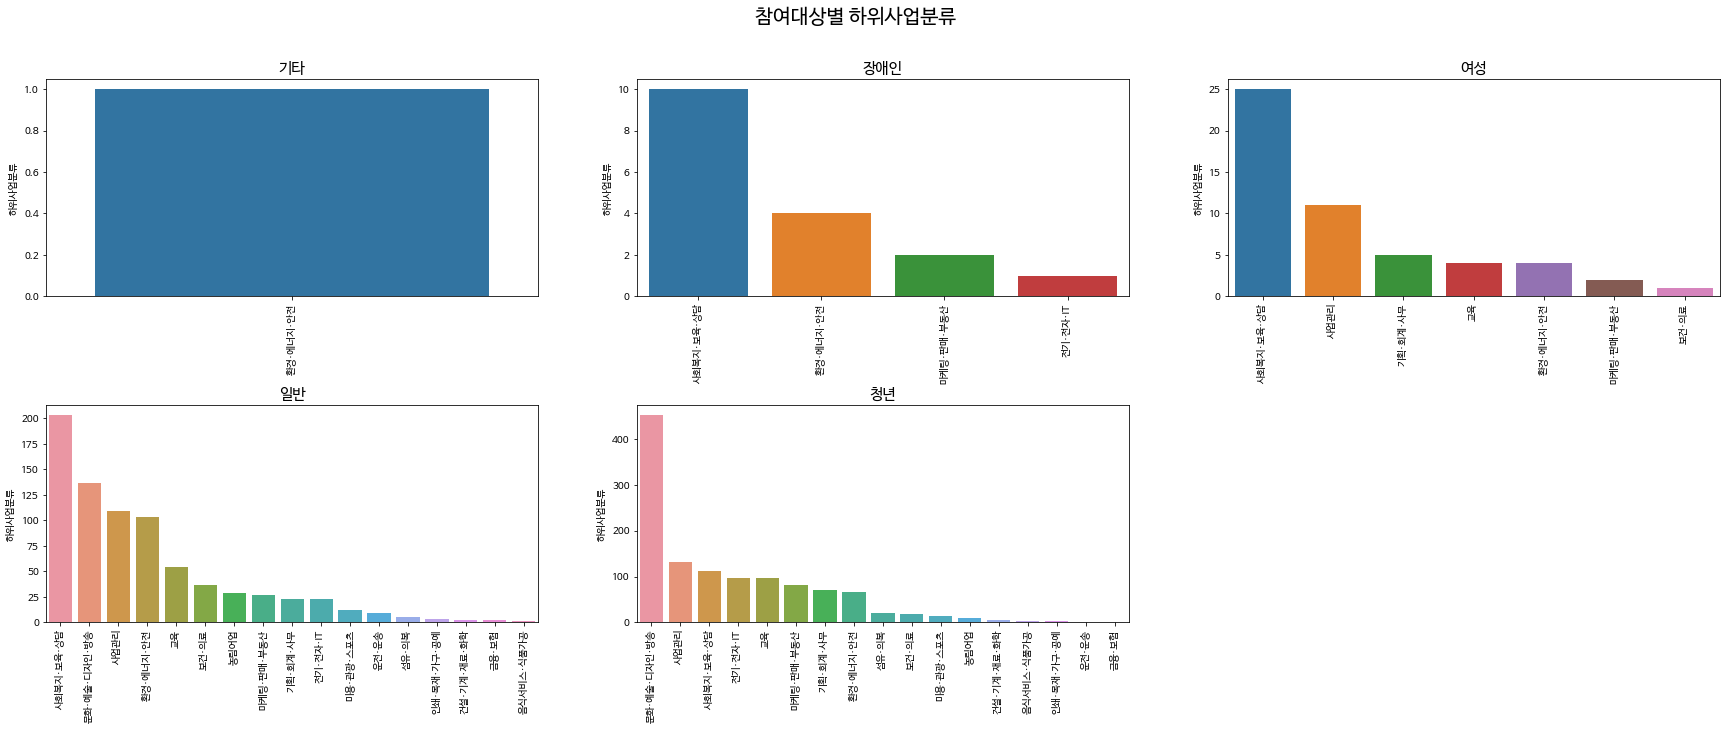

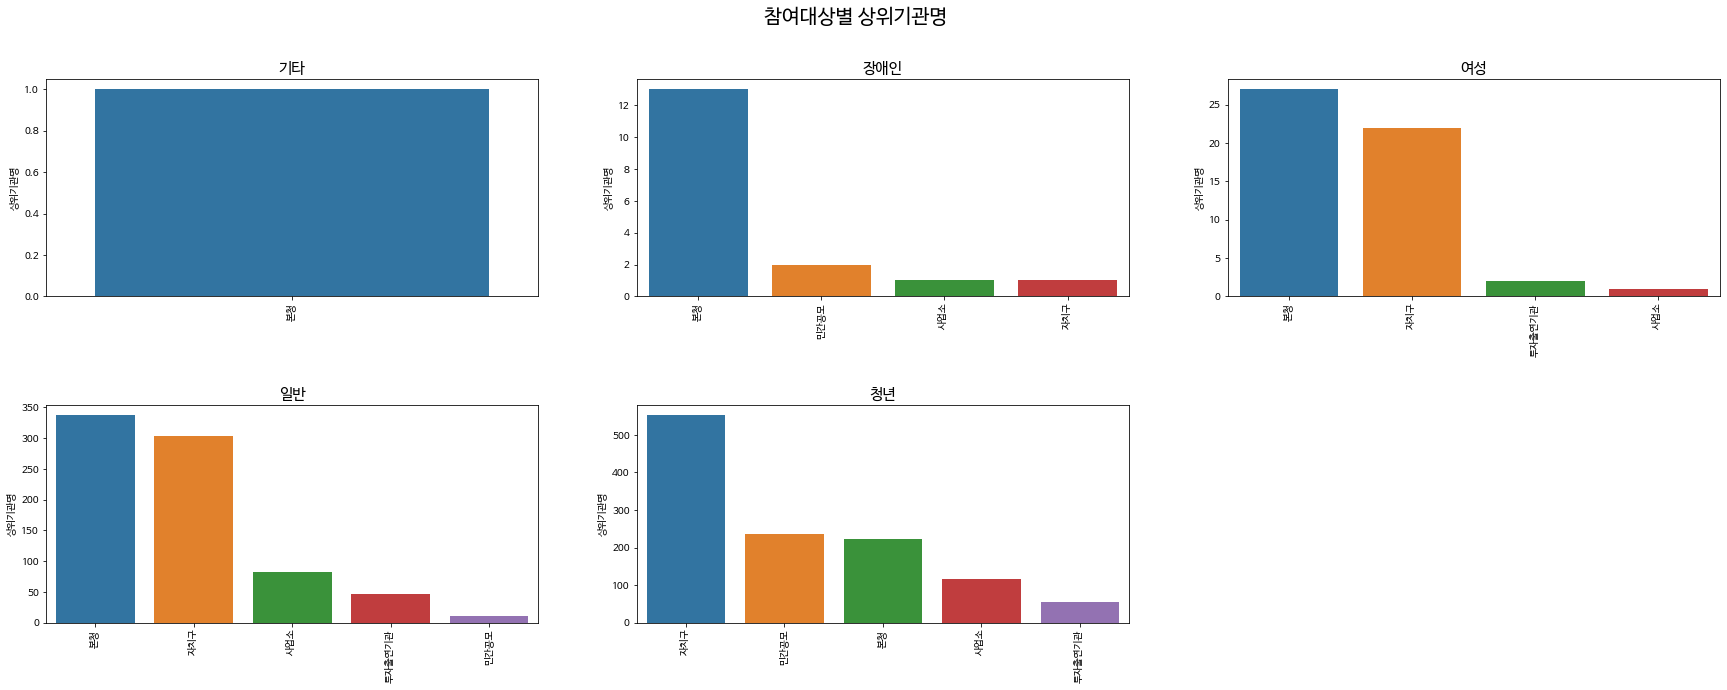

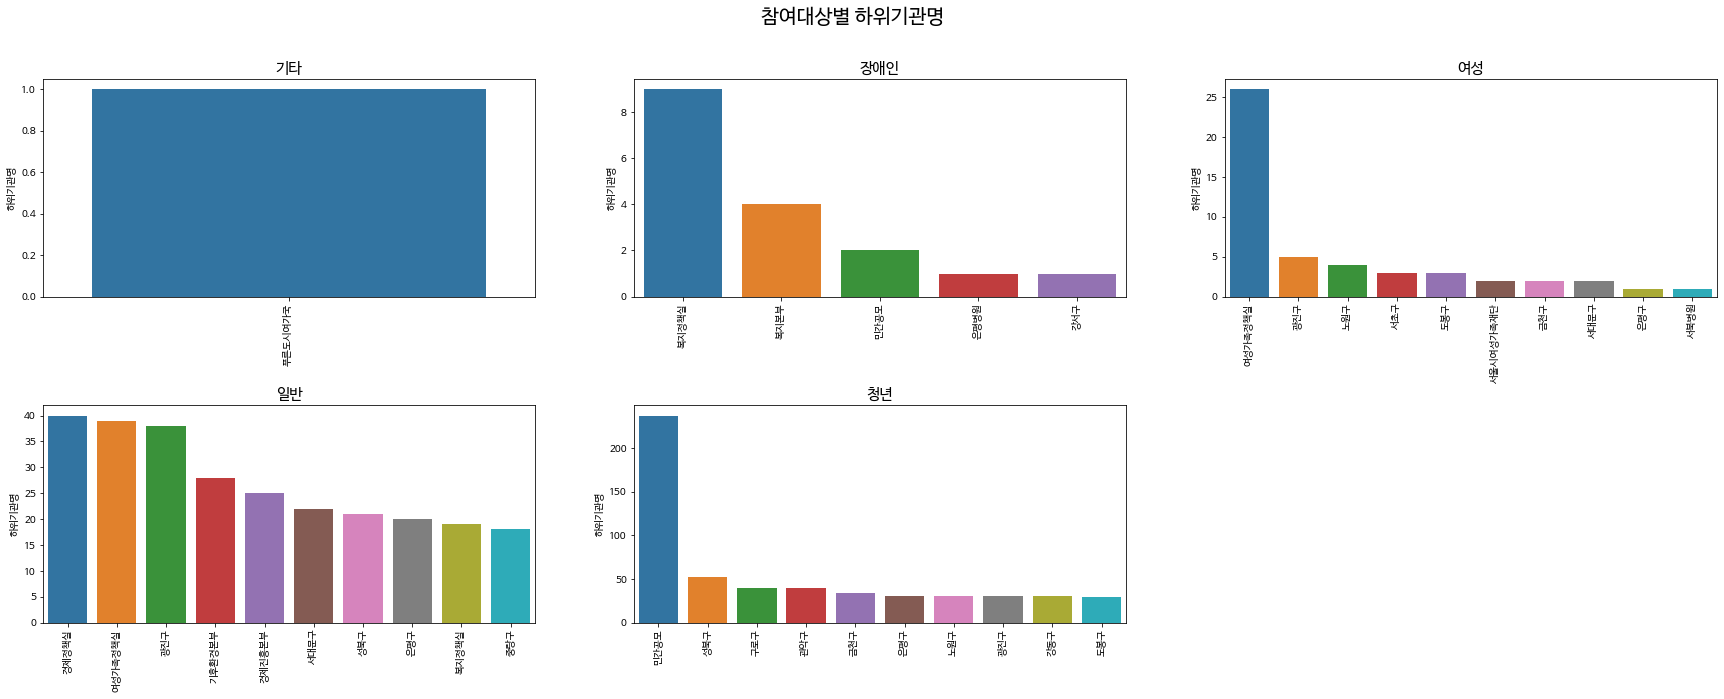

In [265]:
num_plot('참여대상',part)
num_plot('참여대상',day)

b_type = ['상위사업분류','하위사업분류','상위기관명','하위기관명']
obj_plot('참여대상',b_type)

- 파트타임에서는 일반인 다음으로 장애인을 많이 선발할 계획이었지만, 실제 선발 인원에서는 장애인보다 청년의 선발인원이 많았다.

- 또한, 근로시간에서는 청년이 다른 대상보다 조금 길었으며, 장애인의 시급이 조금 더 높게 나타났다.

- 전일근무에서는 계획인원과 선발인원이 전체적으로 비슷한 분포로 흘러가는 것을 확인할 수 있었고, 근로시간과 시급 또한 큰 차이는 보이지 않았다.

- 장애인을 대상으로한 사업은 주로 복지사업이며, 여성과 일반인은 복지와 경제, 그리고 청년을 대상으로 하는 주요 사업은 문화사업이다.

- 본청에서는 주로 장애인을 대상으로 하는 사업을 추진하고 있었으며, 자치구에서는 여성과 일반인 그리고 특히 청년을 대상으로 하는 사업을 추진하고 있다.

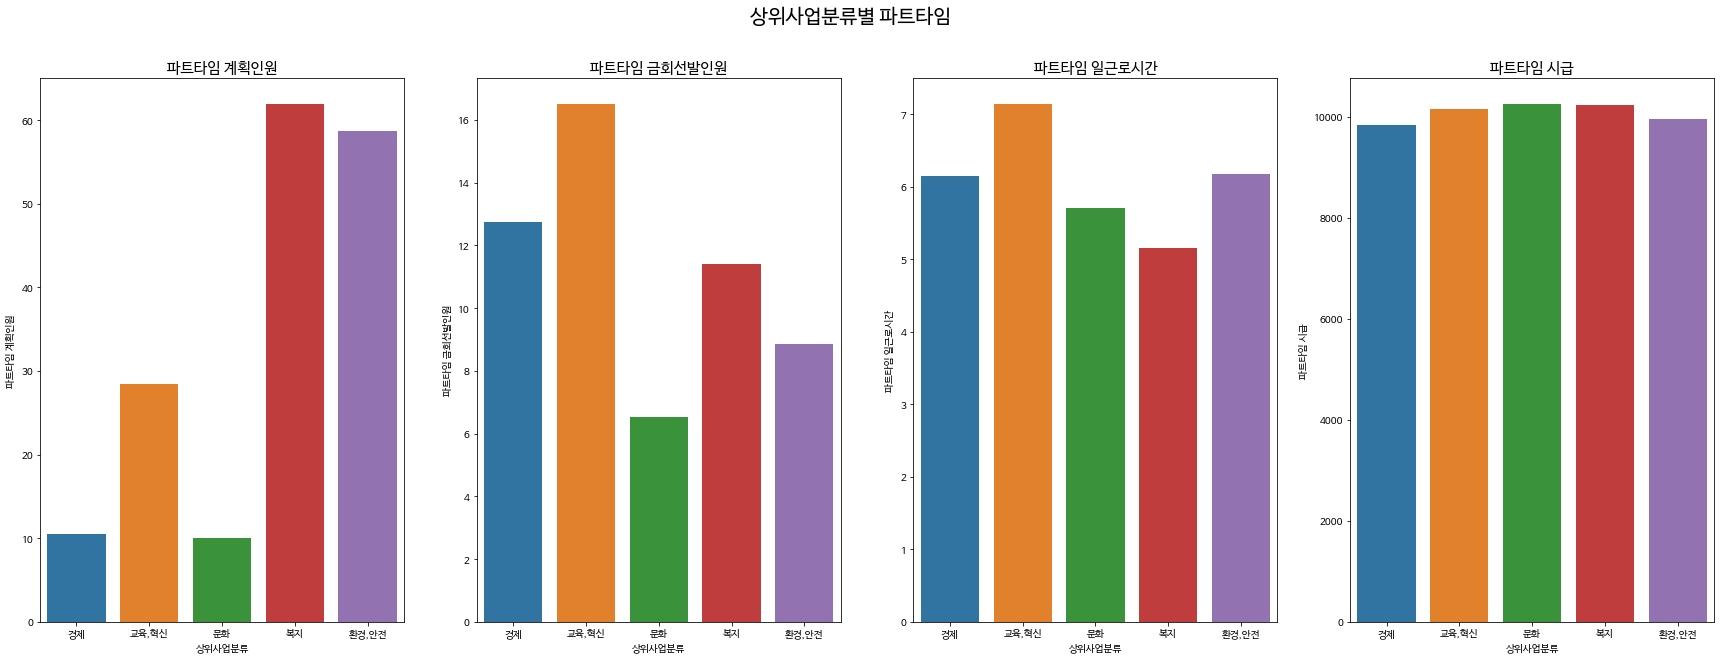

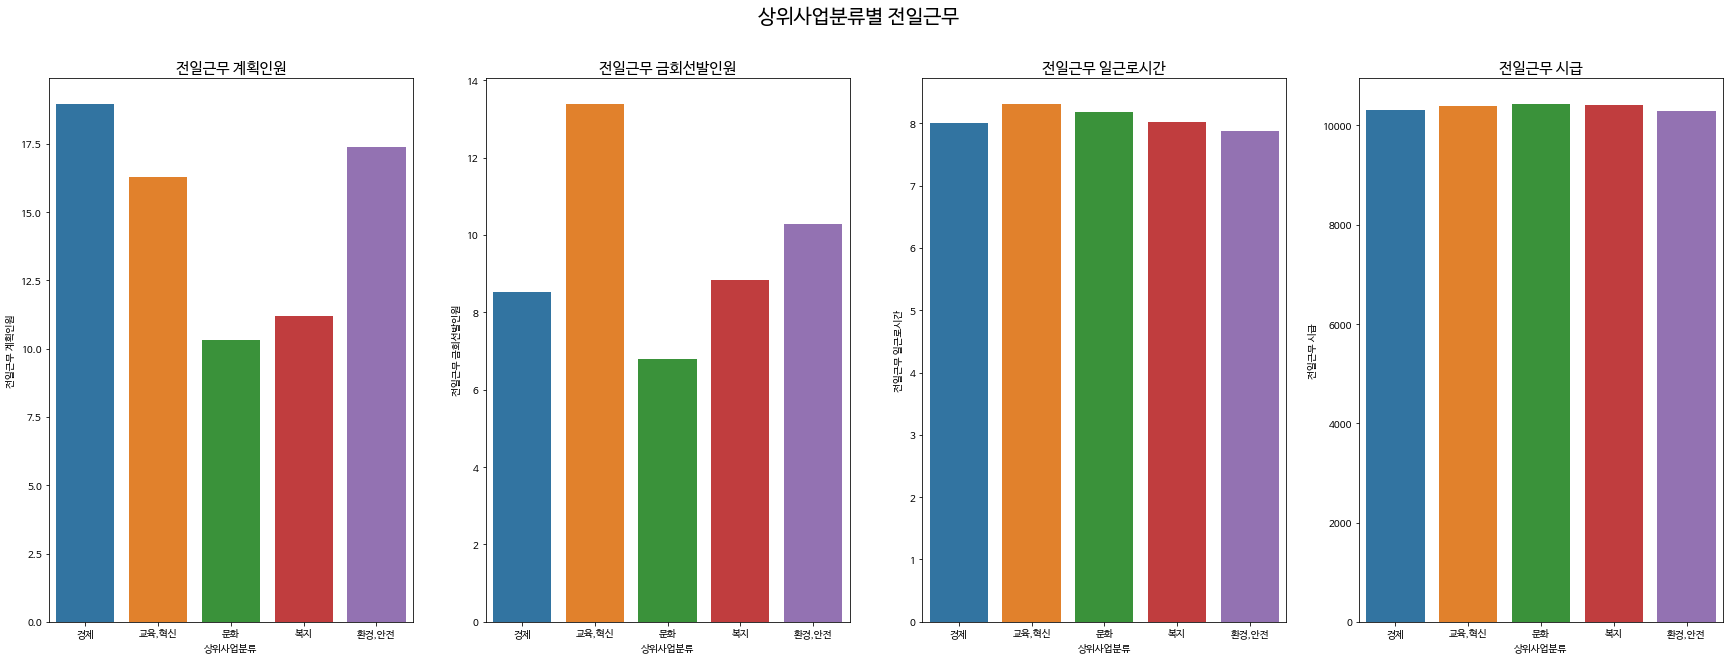

In [266]:
num_plot('상위사업분류',part)
num_plot('상위사업분류',day)

- 파트타임에서는 복지와 환경및안전사업의 인력을 많이 선발할 계획이었지만, 실제로는 교육과혁신 그리고 경제 인원을 많이 선발했다.

- 전일근무에서는 주로 경제사업의 인력을 선발할 계획이었지만, 실제로는 교육및혁신사업의 인력을 많이 선발했다.


- 파트타임에서는 복지사업의 근로시간이 비교적 적었으며, 교육및혁신사업의 근로시간이 비교적 길었다.

- 전일근무의 근로시간도 마찬가지로 교육및혁신사업의 근로시간이 조금 더 길었지만, 파트타임만큼의 차이는 보이지 않았다.

- 사업 분류별 시급에서는 파트타임과 전일근무 모두 큰 차이는 보이지 않았다.